## Code for Data CLeaning

In [2]:
import os
import random
import shutil

# Define the paths
root_folder = "/Users/narendrafuloria/Downloads/Indian-Traffic Sign-Dataset 2/images/"
new_folder = "/Users/narendrafuloria/Downloads/Indian-Traffic Sign-Dataset 2/Test folder"

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Iterate through each subfolder in the root folder
for subfolder in os.listdir(root_folder):
    subfolder_path = os.path.join(root_folder, subfolder)
    
    if os.path.isdir(subfolder_path):
        # Get all image files in the subfolder
        images = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        
        # Rename the images in the subfolder
        for index, image in enumerate(images, start=1):
            old_image_path = os.path.join(subfolder_path, image)
            new_image_name = f"{subfolder}-{index}{os.path.splitext(image)[1]}"  # Retain the original file extension
            new_image_path = os.path.join(subfolder_path, new_image_name)
            os.rename(old_image_path, new_image_path)
        
        # Update the list of images after renaming
        images = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        
        # Select 20% of the images randomly
        selected_images = random.sample(images, max(1, len(images) // 5))
        
        # Move the selected images to the new folder
        for image in selected_images:
            src_image_path = os.path.join(subfolder_path, image)
            dest_image_path = os.path.join(new_folder, image)
            shutil.move(src_image_path, dest_image_path)

# CUSTOM CNN

## Importing Libraries and Setting Up Environment
NumPy, Pandas, Matplotlib, OpenCV, TensorFlow, and other required libraries are imported in the first code blocks.  The role of this libraries is as follows

1. The **NumPy** is used to perfom the scientific computing in Python. It is used for numberic operation and arrays handling, which will play a vital role in image         processing and manipulation.
2.The **Pandas** is powerful libary for handling the data, that provides the data structure for efficient data analysis. Also it can handle the tabular data efficiently. It was used to read the data from the CSV file and perfoming data exploration.
3. **Matplotlib** is 2D plotting library used to provide visualizations in Python. It is used for charting performance measures including loss and accuracy over training epochs, presenting visuals, and visualizing data distributions.
4. For operations involving the loading, resizing, and manipulation of images, OpenCV is utilized. In computer vision applications, such as preprocessing pictures for deep learning model training, it is an invaluable tool.
5. TensorFlow is developed by Google which an open source deep learning framework. It provides tools and librires which can be used for deep learning models. It is a core library used in the development, testing, and training of deep learning models. It has features for creating neural networks, specifying loss functions, training and improving models.
6. PIL is Python Imaging library which will be used for loading and resizing the images. It helps the OpenCV in image processing.
7. The OS and pathlib libraries are used for reading the folder directories of input dataset, which can also be used for loading datasheets and saving model files.
8. A library called Random can be utilized as an alternative optimizer while teaching neural networks. It is selected based on trial and error method also for possible advantages of particular issue.
9. The sklearn named Scikit-learn is used to calculate the model perfomance. the train_test_split is a function which will commonly used to splitting datasets into traning and testing sets.
10. Pre-trained models, such as MobileNetV2, VGG19 are accessed via TensorFlow Hub and utilized as basic models for transfer learning. It makes easier to incorporate pre-trained models into unique structures.


We are using the pre tranied transfer learning model which is Transfer Learning with InceptionV3 for this we are importing the libraries and also given the overview about them below.

### InceptionV3 Model Import

Imports the pre-trained InceptionV3 model, a widely used architecture for image classification applications. Using InceptionV3's transfer learning feature, one may improve performance on a particular task by applying the information gleaned from a big dataset (ImageNet).


### Image Preprocessing and Decoding Libraries

**image**: This will help us to import and prepare photos before supplying them to a neural network.


**preprocess_input**: It includes InceptionV3-specific preparation methods to make sure input photos are prepared appropriately before prediction.
decode_predictions: This will generate a list of (class, description, probability) for every prediction by translating the outcomes of the predictions into human-readable labels.

### Layers for Custom Model

Conv2D: Convolutional layer for 2D spatial convolution.

MaxPool2D: Max pooling layer for down sampling spatial dimensions.

Dense: Fully connected layer.

Flatten: Input must be compressed in order to go from convolutional layers to fully connected layers.

Dropout: A regularization method that, in order to minimize overfitting, randomly sets some of the input units to zero during training.

The code in this patch indicates a move toward Transfer Learning using the InceptionV3 architecture. The chosen libraries allow extra layers to be designed for a bespoke model that customizes the architecture to the particular Traffic Sign Recognition problem, in addition to including InceptionV3 as the foundation model. Conv2D, MaxPool2D, Dense, Flatten, and Dropout layers are incorporated to enable the development of a unique model that makes use of the characteristics acquired by InceptionV3 and adjusts to the subtleties of the traffic sign dataset. By adding task-specific modifications to a pre-trained model, this method seeks to improve both model performance and resilience.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import pathlib
import random as rn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
import tensorflow_hub as hub
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

from tensorflow.keras.callbacks import ReduceLROnPlateau
import seaborn as sns


from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter


# adding an initialiser

import tensorflow as tf
from tensorflow.keras import layers, models, initializers

# adding a reflective layer
from keras.layers import Layer


# Transfer Learning with InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))


Num GPUs Available:  1


## Data Directories and Image Dimensions

### Data Directories:
The variable data_dir will store the folder path of where the German Traffic Sign Recognition Benchmark (GTSRB) dataset is located.
The variable train_path will store the folder path of the training set within the GTSRB dataset.
The variable test_path will store the folder path of the test set within the GTSRB dataset.

### Image Dimensions:
Sets the major image parameters like height and width to 64 pixels each.

In [4]:
data_dir = "/Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/"
train_path = "/Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/Final_Training/Images/"
test_path = "//Users/narendrafuloria/Desktop/Indian_Dataset cleaned 2/Final_Test/Images/"
height = 64
width = 64

## Traffic Sign Classes

This block builds a dictionary named classes, which associates class indices with description of traffic signs. A distinct traffic sign class is represented by each key-value pair in the dictionary.
Using this dictionary, the model's output is decoded to provide human-readable labels for every type of predicted traffic signs.

In [5]:
classes = { 0:'Give way',
            1:'No entry',
            2:'One-way traffic',
            3:'No vehcils in both directions',
            4:'NO ENTRY FOR CYCLES',
            5:'NO ENTRY FOR GOODS VEHCILS',
            6:'NO ENTRY FOR PEDESTRIANS',
            7:'NO ENTRY FOR BULLOCK CARTS',
            8:'NO ENTRY FOR HAND CARTS',
            9:'NO ENTRY FOR MOTOR VEHCILS',
            10:'HEIGHT LIMIT',
            11:'WEIGHT LIMIT',
            12:'AXLE WEIGHT LIMIT',
            13:'LENGTH LIMIT',
            14:'NO LEFT TURN',
            15:'NO RIGHT TURN',
            16:'NO OVERTAKING',
            17:'MAXIMUM SPEED LIMIT 90KM/HR',
            18:'MAXIMUM SPEED LIMIT 110 KM/HR',
            19:'HORN PROHIBITED',
            20:'NO PARKING',
            21:'NO STOPPING',
            22:'TURN LEFT',
            23:'TURN RIGHT',
            24:'STEEP DESCENT',
            25:'STEEP ASCENT',
            26:'NARROW ROAD',
            27: 'NARROW BRIDGE',
            28:'UNPROTECTED QUAY',
            29:'ROAD HUMP',
            30:'DIP',
            31:'LOOSE GRAVEL',
            32:'FALLING ROCKS',
            33:'CATTLE',
            34:'CROSSROADS',
            35:'SIDE ROAD JUNCTION',
            
            36:'OBLIQUE SIDE ROAD JUNCTION',
            37:'T- JUNCTION',
            38:'Y-JUNCTION',
            39:'STAGGERD SIDE ROAD JUNCTION',
            
            40: 'ROUNDABOUT',
            41: 'GUARDED LEVEL CROSSING AHEAD',
            42: 'UNGUARDED LEVEL CROSSING AHEAD',
            43: 'LEVEL CROSSING COUNTDOWN MARKER',

            44: 'PARKING',
            45: 'BUS STOP',
            46: 'FIRST AID POST',
            47: 'TELEPHONE',
            48: 'FILLING STATION',
            49: 'HOTEL',
            50: 'RESTAURANT',
            51: 'REFRESHMENTS'}
            

## Batch Size and Seed

### Batch Size:
Determines the batch size for neural network training. The quantity of training samples used in a single iteration is referred to as the batch size. While smaller batches may help with regularization and occasionally converge more quickly, bigger batches can speed up computing.

### Seed:
Sets the seed for generating random numbers. Maintaining repeatability requires this. By establishing a seed, random operations (such as data shuffling and weight initialization) become deterministic, guaranteeing that the same code executed with the same seed will produce the same outcomes. This helps with consistency of results and troubleshooting.

In [6]:
batch_size = 100
seed = 42

## ENHANCING IMAGE

The provided enhance_image function is a pipeline for improving an image by applying sharpening and denoising. Here's a breakdown of what it does:

### Input Validation:

The input image is converted into a NumPy array. This ensures compatibility with OpenCV and subsequent processing steps.
It is scaled and typecast to uint8, which is essential for OpenCV functions that expect images in this format.

### Sharpening:
A sharpening kernel ([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) is applied using OpenCV's filter2D function. This enhances edges and fine details in the image.

### Denoising:
The fastNlMeansDenoisingColored method from OpenCV is used to reduce noise. The parameters (10, 10, 7, 21) are:

h: Strength of noise reduction for the luminance channel.
hColor: Strength of noise reduction for the chrominance channel.
templateWindowSize: Size of the template patch used for noise removal.
searchWindowSize: Size of the window used to compute weighted averages.

### Optional Rescaling:
The final image is converted back to float32 format, which is often used for TensorFlow or deep learning applications where pixel values are scaled between 0 and 1.

In [7]:


def enhance_image(image):
    # Ensure image is in range [0, 255] and type uint8 for OpenCV
    # Scale to [0, 255]
    image = np.array(image)  # Scale to [0, 255]

    image = image.astype(np.uint8)  # Convert to uint8

    # Apply sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)

    # Apply denoising
    denoised = cv2.fastNlMeansDenoisingColored(sharpened, None, 10, 10, 7, 21)

    # Optionally, rescale back to [0, 1] for TensorFlow compatibility
    enhanced_image = denoised.astype(np.float32) 

    return enhanced_image


## ImageDataGenerator
ImageDataGenerator is a Keras utility that provides data augmentation and preprocessing pipelines for images.

### Key Parameters in ImageDataGenerator:
rescale=1./255:
Scales pixel values from the range [0, 255] to [0, 1]. This normalization is often used to improve numerical stability during training.

rotation_range=20:
Randomly rotates images within a range of ±20 degrees.

zoom_range=0.2:
Randomly zooms into images by up to 20%.

vertical_flip=True:
Randomly flips images vertically.

validation_split=0.2:
Reserves 20% of the dataset for validation.

preprocessing_function=enhance_image:
It applies the custom enhance_image function to each image after loading. This is useful for applying domain-specific enhancements, like sharpening or denoising.

## train_datagen.flow_from_directory
This method loads images from a directory structure and applies the transformations defined in ImageDataGenerator.

Arguments in flow_from_directory:
train_path:
Directory path containing subdirectories of images, where each subdirectory corresponds to a class label.

target_size=(height, width):
Resizes all images to the specified dimensions 

batch_size=batch_size:
Number of images to return in each batch.

class_mode='categorical':
Specifies the label format. Here, it assumes multi-class classification and one-hot encodes the labels.

shuffle=True:
Randomly shuffles the data at each epoch to reduce overfitting.

seed=seed:
Sets the random seed for reproducibility of shuffling and transformations.

color_mode='rgb':
Specifies that images are loaded in RGB mode (3 channels).

interpolation='hamming':
Defines the interpolation method used when resizing images. The Hamming method emphasizes edge preservation and is useful for certain types of data.

subset='training':
Specifies that only the training subset of the data should be used (80% in this case, per validation_split).

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 20, zoom_range = 0.2, vertical_flip =True,
                                   validation_split=0.2 ,preprocessing_function=enhance_image)

train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')
                                                 


test_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 20, zoom_range = 0.2,vertical_flip = True,
                                  validation_split=0.2, preprocessing_function=enhance_image)

test_dataset = test_datagen.flow_from_directory(train_path, 
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')
print(len(train_dataset))

Found 10155 images belonging to 52 classes.
Found 2510 images belonging to 52 classes.
102


## Data Visualization: Sample Images
This code block creates a subplot grid to show a selection of the training dataset's photos and the labels that go with them. This code block imports a batch of photos and their respective labels from the training dataset, creates a 3x4 subplot grid using Matplotlib, and then shows a selection of these images and their labels in the subplot grid. Checking the training data and making sure the labels and pictures are loaded correctly are made easier with the aid of this visualization. Out of the batch, the photographs are selected at random to be shown. For better visibility, we may can change the subplot grid's size and layout options.

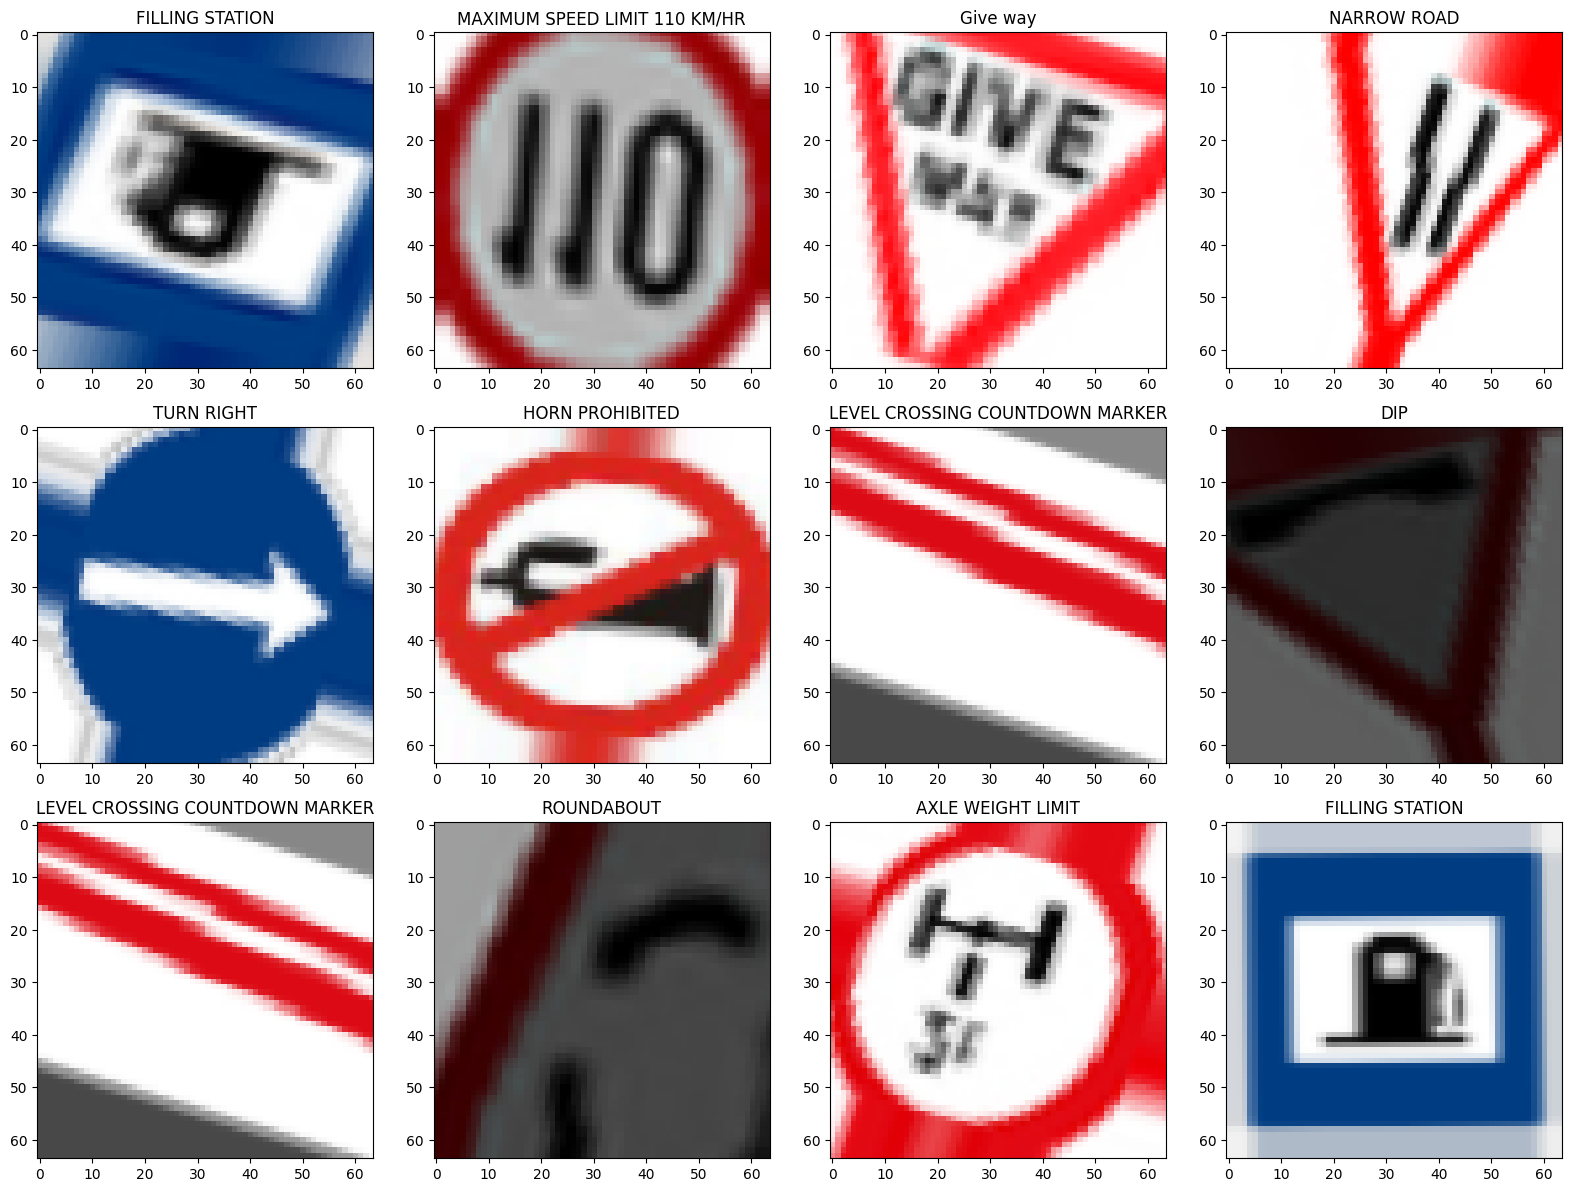

In [9]:

fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,batch_size-1)
        label = classes[int(list(train_dataset.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()

## Reflective Padding:
Commonly used in image processing tasks to avoid boundary artifacts by mirroring edge pixels.
Contrast with zero-padding or constant-padding, where padding introduces new values.

1. Initialization (__init__ method):
Inputs:
padding: Specifies the padding size. It is a tuple (height_padding, width_padding). Default is (1, 1).
**kwargs: Additional arguments for the parent Layer class.
Calls the constructor of the parent class (super()) and sets the padding attribute.
2. Forward Pass (call method):
Takes inputs (a tensor).
Applies reflective padding using tf.pad. The padding configuration:
[0, 0]: No padding on the batch dimension.
[self.padding[0], self.padding[0]]: Padding on the height dimension (top and bottom).
[self.padding[1], self.padding[1]]: Padding on the width dimension (left and right).
[0, 0]: No padding on the channel dimension.
Uses the mode='REFLECT' for reflective padding, which mirrors the values of the input tensor around its edges.
3. Output Shape Calculation (compute_output_shape method):
Inputs:
input_shape: The shape of the input tensor (batch_size, height, width, channels).
Returns the modified shape:
Batch size remains the same (input_shape[0]).
Height increases by 2 * self.padding[0] (top and bottom).
Width increases by 2 * self.padding[1] (left and right).
Channels remain unchanged.

In [10]:
class ReflectivePadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        super(ReflectivePadding2D, self).__init__(**kwargs)
        self.padding = padding

    def call(self, inputs):
        return tf.pad(inputs, [[0, 0], [self.padding[0], self.padding[0]], [self.padding[1], self.padding[1]], [0, 0]], mode='REFLECT')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 
                input_shape[1] + 2 * self.padding[0], 
                input_shape[2] + 2 * self.padding[1], 
                input_shape[3])


## Convolutional Neural Network (CNN) Architecture
Using Keras' Sequential API, this code block constructs a Convolutional Neural Network (CNN) model.

This CNN architecture consists of the following layers:

**Convolutional Layers:** Two convolutional layers with Swish activation, kernel size of 5,3 respectively and filters of 64 and 64. Input pictures size is of form (height, width, 3: which are already set) will sent into the first layer.

**Reflective Padding** : Used to enhance the efficiency of CNN model

**MaxPooling Layer:** Using a pool size of (2, 2), the MaxPooling layer reduces computational complexity of the network and controlls overfitting.

**Batch Normalization:** After every convolutional layer, batch normalization is used to speed up and stabilize the training process.

Dropout Layer :To avoid overfitting, a dropout layer with a dropout rate of 0.5 is introduced.

**Additional Convolutional Layers:** Following two additional MaxPooling layers and Batch Normalization layers, there are two more convolutional layers with 128 filters, kernel sizes (3, 3), and Swish activation. To avoid overfitting, a dropout layer with a dropout rate of 0.5 is introduced.

**Additional Convolutional Layers:** Following two additional MaxPooling layers and Batch Normalization layers, there are two more convolutional layers with 256 filters, kernel sizes (3, 3), and Swish activation. To avoid overfitting, a dropout layer with a dropout rate of 0.5 is introduced.

**Flatten Layer:** To transform the 2D feature maps into a 1D vector, which flattens the layer.

Dense(Fully Connected)Layers: Swish activation and 512 neurons make up a dense layer. Batch normalization and dropout are used for regularization after that.

Output Layer The output layer for multiclass classification uses softmax activation and has 52 neurons, which corresponds to the number of traffic sign classes.


The purpose of this model architecture is to do picture classification tasks, specifically traffic sign recognition. The fully connected layers base their predictions on the hierarchical information that the convolutional layers have captured. For better generalization and regularization during training, batch normalization and dropout are added.

## Swish Activation
The Swish activation function is a smooth, non-monotonic function proposed by researchers at Google. It is defined as:

Swish(𝑥)=𝑥⋅𝜎(𝑥)
Swish(x)=x⋅σ(x)

where σ(x) is the sigmoid function, given by:


σ(x)= 1/1+e −x
 
​
 
Key Properties of Swish
Range:

Unlike ReLU (which is zero for negative inputs), Swish outputs small negative values for negative inputs.
The output lies between approximately −0.278 (minimum) and ∞

Smoothness:
Swish is continuously differentiable, unlike ReLU which has a discontinuity at x=0.

Non-Monotonicity:
Swish is non-monotonic (it decreases and then increases), which allows it to capture more complex patterns compared to ReLU or sigmoid.

In [11]:
model = keras.models.Sequential([ReflectivePadding2D(padding=(1, 1), input_shape=(height, width, 3)),
    keras.layers.Conv2D(filters= 64 , kernel_size=(5,5), activation='swish', kernel_initializer=initializers.HeNormal()),
    ReflectivePadding2D(padding=(1, 1)),
    keras.layers.Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer=initializers.HeNormal(), activation='swish'),

    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.5),


    ReflectivePadding2D(padding=(1, 1)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3),kernel_initializer=initializers.HeNormal(), activation='swish'),

    ReflectivePadding2D(padding=(1, 1)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), kernel_initializer=initializers.HeNormal(), activation='swish'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.5),

    ReflectivePadding2D(padding=(1, 1)),
    keras.layers.Conv2D(filters= 256, kernel_size=(3,3), kernel_initializer=initializers.HeNormal(), activation='swish'),
    ReflectivePadding2D(padding=(1, 1)),
    keras.layers.Conv2D(filters= 256, kernel_size=(3,3), kernel_initializer=initializers.HeNormal(), activation='swish'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, kernel_initializer=initializers.HeNormal(), activation='swish'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),


    keras.layers.Dense(52, activation='softmax')
])

2024-11-22 01:43:17.749676: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-22 01:43:17.749699: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-22 01:43:17.749706: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-22 01:43:17.749886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-22 01:43:17.749903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model Summary
The architecture and parameters of the specified neural network are summarized by the function "model.summary(),".

Model Architecture: Layers are added to the model in a sequential fashion since it is a sequential model.

Layers: Conv2D, Reflectivepadding, MaxPooling2D, BatchNormalization, Dropout, Flatten, and Dense layers make up the architecture

Output Shape : Every layer has a defined output.

Parameters: Each layer's total number of weights and biases is displayed. Both teachable and untrainable.

Trainable and Non-trainable Parameters: Shows the total number of parameters as well as trainable and non-trainable parameters.

This overview helps us to understand the complex nature of the model by giving an overview of the amount of parameters and the layout of the neural network layers.

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reflective_padding2d (Refl  (None, 66, 66, 3)         0         
 ectivePadding2D)                                                
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 64)        4864      
                                                                 
 reflective_padding2d_1 (Re  (None, 64, 64, 64)        0         
 flectivePadding2D)                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                        

Model Compilation
The neural network model is assembled using certain training configurations in this code block.

Learning Rate: The learning rate(alpha) is set to 0.01. One hyperparameter that regulates the step size during optimization is the learning rate. While a smaller learning rate is often chosen to ensure a stable and smooth convergence. It also runs the risk of exceeding the ideal values.

Number of Epochs: There are fifteen epochs in all. One whole run through the whole training dataset is referred to as an epoch. The model may learn from the data across several iterations by training over multiple epochs.

Optimizer: The optimization process selects the Adam optimizer, which has a 0.01 learning rate. Adam is a well-liked optimization technique that may accelerate resolution by adjusting the learning rates for each parameter separately.

Model Compilation: Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.

By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch throughout training, this stage gets the model ready for training.

### ReduceLROnPlateau:
Callback in Keras, which dynamically adjusts the learning rate during training. Here's a breakdown of the parameters and their significance:

monitor='val_loss':

The metric being monitored for improvement, typically validation loss in this case. If no improvement is observed in val_loss for a certain number of epochs (patience), the learning rate will be reduced.

factor=0.5:

The learning rate will be multiplied by this factor when it is reduced. For example, if the current learning rate is 0.01, it will become 0.005 when reduced.

patience=2:

Specifies how many epochs without improvement are allowed before the learning rate is reduced. Here, if val_loss doesn't improve for 2 consecutive epochs, the learning rate is reduced.

min_delta=1e-2:

Represents the minimum change in the monitored metric to qualify as an improvement. For example, val_loss must decrease by at least 0.01 to be considered an improvement.

cooldown=0:

After reducing the learning rate, the callback will wait this number of epochs before monitoring for further improvements.

min_lr=1e-6:

This is the lower bound for the learning rate; the learning rate will not be reduced below this value.

Benefits

Prevents overfitting by reducing the learning rate when the model stagnates.
Helps the optimizer converge more efficiently, especially during the later stages of training.

### EarlyStopping 
Callback in Keras, which halts training early when the model's performance stops improving.

 Here's an explanation of the parameters:

monitor='val_loss':

Specifies that the callback will monitor the validation loss. If the validation loss does not improve for a set number of epochs (patience), training will be stopped.

patience=5:

The number of epochs with no improvement in the monitored metric (val_loss) before stopping the training. In this case, training will stop if the val_loss does not improve for 5 consecutive epochs.

verbose=1:

Controls the verbosity of the output. Setting it to 1 means that the training process will output a message when early stopping occurs (e.g., when training is halted due to lack of improvement).

restore_best_weights=True:

After stopping the training, this ensures that the model weights are restored to the epoch where the monitored metric (val_loss) was the best. This is useful to avoid overfitting due to the final model weights, which may be over-optimized for later epochs.



In [54]:
alpha= 0.001
epochs=100
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.5,          # Factor by which the learning rate will be reduced
    patience=2,         # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-2,      # Minimum change to qualify as an improvement
    cooldown=0,          # Number of epochs to wait before resuming normal operation after lr has been reduced
    min_lr=1e-6          # Lower bound on the learning rate
)
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding early stopping 

early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=5,            # Number of epochs with no improvement before stopping
    verbose=1,             # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)





### Model Training

Training Data: The dataset that the fit function was trained on. The model is trained using this dataset.

Steps per Epoch: The number of training dataset steps (batches) that must be processed before going on to the following epoch. The training dataset's length is what it is configured to.

Number of Epochs: Total number of epochs during which the model is going to be trained.

Data Validation: The validation dataset used to assess the performance of the model at the end of every epoch.

Validation Steps: The number of steps (batches) to process from the validation dataset at the conclusion of each epoch will be decided by length of testting dataset.

Training History: Each epoch's training and validation loss and accuracy are recorded in the training history, which is kept in the history variable.

The training phase is started by this function, during which the model changes its weights, learns from the training data, and is assessed using the validation data. Analyzing the model's performance and possible over, or underfitting during training may be done with the help of the training history.

In [14]:

history = model.fit(train_dataset,
                    steps_per_epoch=len(train_dataset),
                    epochs=epochs,
                    validation_data=test_dataset,
                    validation_steps=len(test_dataset), callbacks = (reduce_lr, early_stopping))
                

Epoch 1/100


2024-11-22 01:43:18.680391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


102/102 [==============================] - 45s 435ms/step - loss: 2.6151 - accuracy: 0.3596 - val_loss: 9.8768 - val_accuracy: 0.0809 - lr: 0.0010
Epoch 2/100
102/102 [==============================] - 44s 427ms/step - loss: 1.1928 - accuracy: 0.6497 - val_loss: 6.9059 - val_accuracy: 0.1163 - lr: 0.0010
Epoch 3/100
102/102 [==============================] - 44s 429ms/step - loss: 0.7366 - accuracy: 0.7756 - val_loss: 2.6370 - val_accuracy: 0.4355 - lr: 0.0010
Epoch 4/100
102/102 [==============================] - 44s 435ms/step - loss: 0.5341 - accuracy: 0.8347 - val_loss: 0.9052 - val_accuracy: 0.7598 - lr: 0.0010
Epoch 5/100
102/102 [==============================] - 46s 446ms/step - loss: 0.4323 - accuracy: 0.8639 - val_loss: 0.5839 - val_accuracy: 0.8454 - lr: 0.0010
Epoch 6/100
102/102 [==============================] - 47s 458ms/step - loss: 0.3549 - accuracy: 0.8889 - val_loss: 0.3633 - val_accuracy: 0.8948 - lr: 0.0010
Epoch 7/100
102/102 [==============================] - 47s

### CNN Model Performance Visualization
Performance DataFrame:
performance = pd.DataFrame(mob_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plotting.

Loss Plot:

ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
ax[1].set_title('Model Loss'): Sets the title for the loss plot.
ax[1].set_xlabel('Epochs'): Sets the x-axis label.
ax[1].set_ylabel('Loss'): Sets the y-axis label.


Accuracy Plot:

ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
ax[0].set_xlabel('Epochs'): Sets the x-axis label.
ax[0].set_ylabel('Accuracy'): Sets the y-axis label.

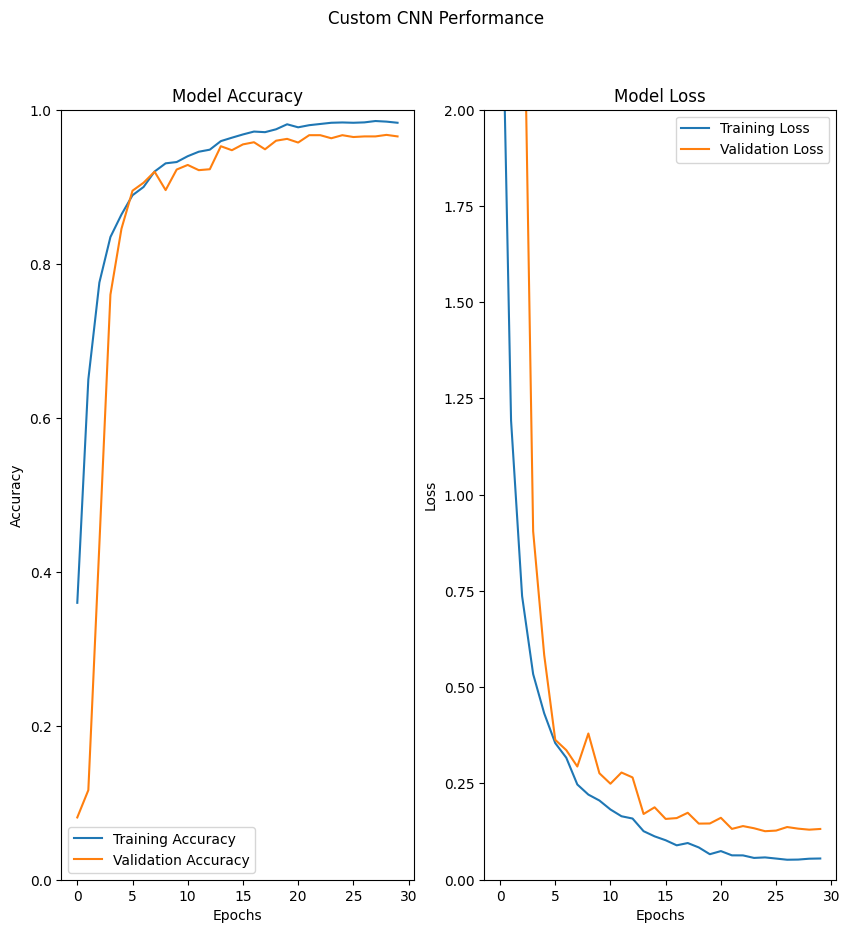

<Figure size 1000x700 with 0 Axes>

In [15]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,10)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,2)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0,1)
fig.suptitle('Custom CNN Performance')
plt.show()

### Saving the Custom CNN Model
With this line, the complete Custom CNN model including the weights, settings, and architecture is saved to a file called "CNN.h5." It is usual practice to save models in the Hierarchical Data Format (HDF5) using the ".h5" extension.

In [ ]:
model.save("CNN.h5")


### 1. Mapping Predictions (map_pred function)
This function is used to map the predicted class indices back to the actual class labels. The function takes a list of predicted indices (pred), and for each predicted index i, it retrieves the class label corresponding to that index from train_dataset.class_indices (which presumably maps class labels to indices). It returns a list of these class labels.

### 2. Preprocessing Function (preprocess_image):
This function preprocesses an input image (image) by:

Converting it to grayscale for better readability and easier processing.
Applying histogram equalization to improve contrast in the image.
Applying Gaussian blur to reduce noise.
Sharpening the image to enhance edges and details.
Converting the image back to RGB to maintain color channels (even though the image started as grayscale).
The resulting processed_image is returned for further use.

### 3. Image Loading and Processing Loop:
This part loops through all files in the test_path directory, processing each image:

It ignores files starting with .D.
Extracts a label (likely the first two characters of the filename) and appends it to the test_labels array.
Appends the image filename to the imgs array.


### 4. Processing and Resizing Images:
In this loop, the code:

Reads each image from the test_path.

Preprocesses it using the preprocess_image function.

(Optionally) applies augmentations, though this part is commented out.

Converts the image to a PIL image (for resizing).

Resizes the image to a specified height and width.

Appends the resized image to the data list.

If an error occurs while processing an image, an error message is printed.

### 6. Final Image Preprocessing:
Finally:

The data list, which contains the processed and resized images, is converted into a NumPy array (X_test).
The pixel values of the images are normalized by dividing by 255, transforming the pixel values from the range [0, 255] to [0, 1]. This normalization step is important for training neural networks, as it helps improve convergence and stability during training.

In [61]:

def map_pred(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]
# test_df = pd.read_csv('/Users/narendrafuloria/content/GTSRB/Final_Test/Images/GT-final_test.csv',delimiter=';')

# Preprocessing function
def preprocess_image(image):
    # Convert to grayscale for better readability
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Histogram Equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)
    
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    # Sharpening to enhance details
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, kernel)
    
    # Convert back to RGB
    processed_image = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2RGB)
    return processed_image

data = []
test_labels = np.array([])
imgs = np.array([])

test_labels = np.array([])
imgs = np.array([])
for filename in os.listdir(test_path):
    
    if filename[0:2] != ".D":
        

        i = np.array(int(filename[0:2]))
        test_labels = np.append(test_labels , i)
        imgs = np.append(imgs,filename)
        

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        
        preprocessed = preprocess_image(image)

        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


### 1. Prediction and Mapping (pred = model.predict(X_test)):
This line uses the trained model (model) to make predictions on the test data (X_test).

The model's predict method returns the predicted class probabilities or class labels for each sample in X_test. In most cases, the result will be a probability distribution over all classes (i.e., for a classification task).

### 2. Converting Predictions to Class Labels (pred = map_pred(pred.argmax(axis=-1))):
pred.argmax(axis=-1) finds the index of the class with the highest probability for each prediction. Since pred is likely a 2D array where each row corresponds to a sample and each column corresponds to a class's probability, argmax(axis=-1) gives you the index of the highest probability for each sample.

map_pred(pred.argmax(axis=-1)) maps these indices back to the actual class labels by calling the map_pred function (which is assumed to map the indices to human-readable class labels).

### 3. F1 Score Calculation (f1 = f1_score(test_labels, pred, average='weighted')):

f1_score(test_labels, pred, average='weighted') computes the F1 score, which is a common evaluation metric for classification models. The F1 score balances precision and recall.

Precision measures how many of the positive predictions were actually correct.

Recall measures how many of the actual positive samples were correctly predicted.

The average='weighted' parameter means that the F1 score is calculated for each class and then averaged, weighted by the number of true instances for each class. This ensures that larger classes have a larger effect on the F1 score.


### 4. Accuracy Score (accuracy_score(test_labels, pred))
accuracy_score(test_labels, pred) calculates the accuracy of the model, which is the percentage of correct predictions out of the total number of predictions. The result is multiplied by 100 to convert it into a percentage format, and then printed.


In [62]:
pred = model.predict(X_test)

pred = map_pred(pred.argmax(axis=-1))
print(pred)

f1 = f1_score(test_labels, pred, average='weighted')  # Use 'macro' or 'micro' if needed
print(f"f1 SCORE is: {f1}")

#r2 = r2_score(test_labels, pred)  # This assumes test_labels and pred are continuous values

def calculate_r1_score(y_true, y_pred):
    """
    Calculate the R1 score (Recall at Rank 1).
    
    Parameters:
    y_true (list): True labels for the data.
    y_pred (list): Predicted labels for the data.
    
    Returns:
    float: R1 score.
    """
    # Ensure y_true and y_pred are numpy arrays for easier manipulation
    # y_true = np.array(y_true)
    # y_pred = np.array(y_pred)
    
    # Initialize a counter for true positives at rank 1
    true_positives = 0
    
    # Iterate through each prediction
    for true_label, predicted_label in zip(y_true, y_pred):
        if true_label == predicted_label:
            true_positives += 1
    
    # Calculate R1 score
    r1_score = true_positives / len(y_true)
    
    return r1_score

print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

calculate_r1_score(test_labels, pred)


27/27 [==============================] - 1s 39ms/step
[41, 3, 39, 47, 26, 1, 0, 6, 8, 41, 39, 3, 3, 10, 15, 7, 41, 28, 13, 33, 12, 0, 3, 3, 46, 43, 14, 18, 36, 48, 16, 25, 9, 35, 7, 16, 7, 16, 48, 15, 41, 49, 51, 8, 44, 39, 51, 6, 41, 47, 11, 37, 28, 13, 14, 5, 35, 47, 48, 23, 5, 34, 11, 38, 15, 41, 35, 39, 20, 39, 15, 43, 7, 25, 4, 45, 48, 45, 43, 28, 7, 41, 4, 40, 34, 35, 17, 35, 12, 38, 36, 17, 11, 30, 46, 45, 10, 26, 2, 39, 47, 16, 50, 19, 48, 43, 8, 2, 16, 19, 45, 26, 43, 16, 24, 1, 34, 43, 14, 16, 25, 7, 0, 7, 39, 16, 35, 1, 41, 41, 48, 12, 29, 9, 43, 12, 16, 35, 38, 50, 35, 2, 0, 16, 18, 0, 45, 9, 43, 48, 21, 39, 3, 42, 43, 25, 50, 15, 16, 39, 49, 39, 26, 15, 43, 4, 29, 29, 7, 11, 6, 23, 3, 6, 10, 37, 27, 16, 35, 3, 10, 26, 8, 18, 49, 7, 1, 35, 13, 43, 13, 15, 15, 1, 8, 4, 5, 9, 31, 11, 43, 17, 4, 43, 31, 18, 33, 9, 28, 26, 2, 21, 16, 22, 22, 37, 2, 2, 44, 26, 2, 17, 33, 22, 3, 34, 7, 44, 51, 38, 7, 41, 11, 1, 43, 3, 39, 3, 6, 16, 9, 37, 43, 4, 48, 2, 34, 36, 31, 1, 39, 41, 42, 

0.8702830188679245

This code:

Generates confusion matrix heatmaps for each class to visualize the performance of the model on a per-class basis.
Computes and plots ROC curves for each class, showing the model's performance with respect to the false positive rate and true positive rate.
Displays the AUC (Area Under the Curve) on each ROC curve to quantify how well the model is distinguishing between classes.
This approach gives a detailed evaluation of a model's classification performance, particularly useful for multi-class classification problems.

27/27 [==============================] - 1s 37ms/step
52


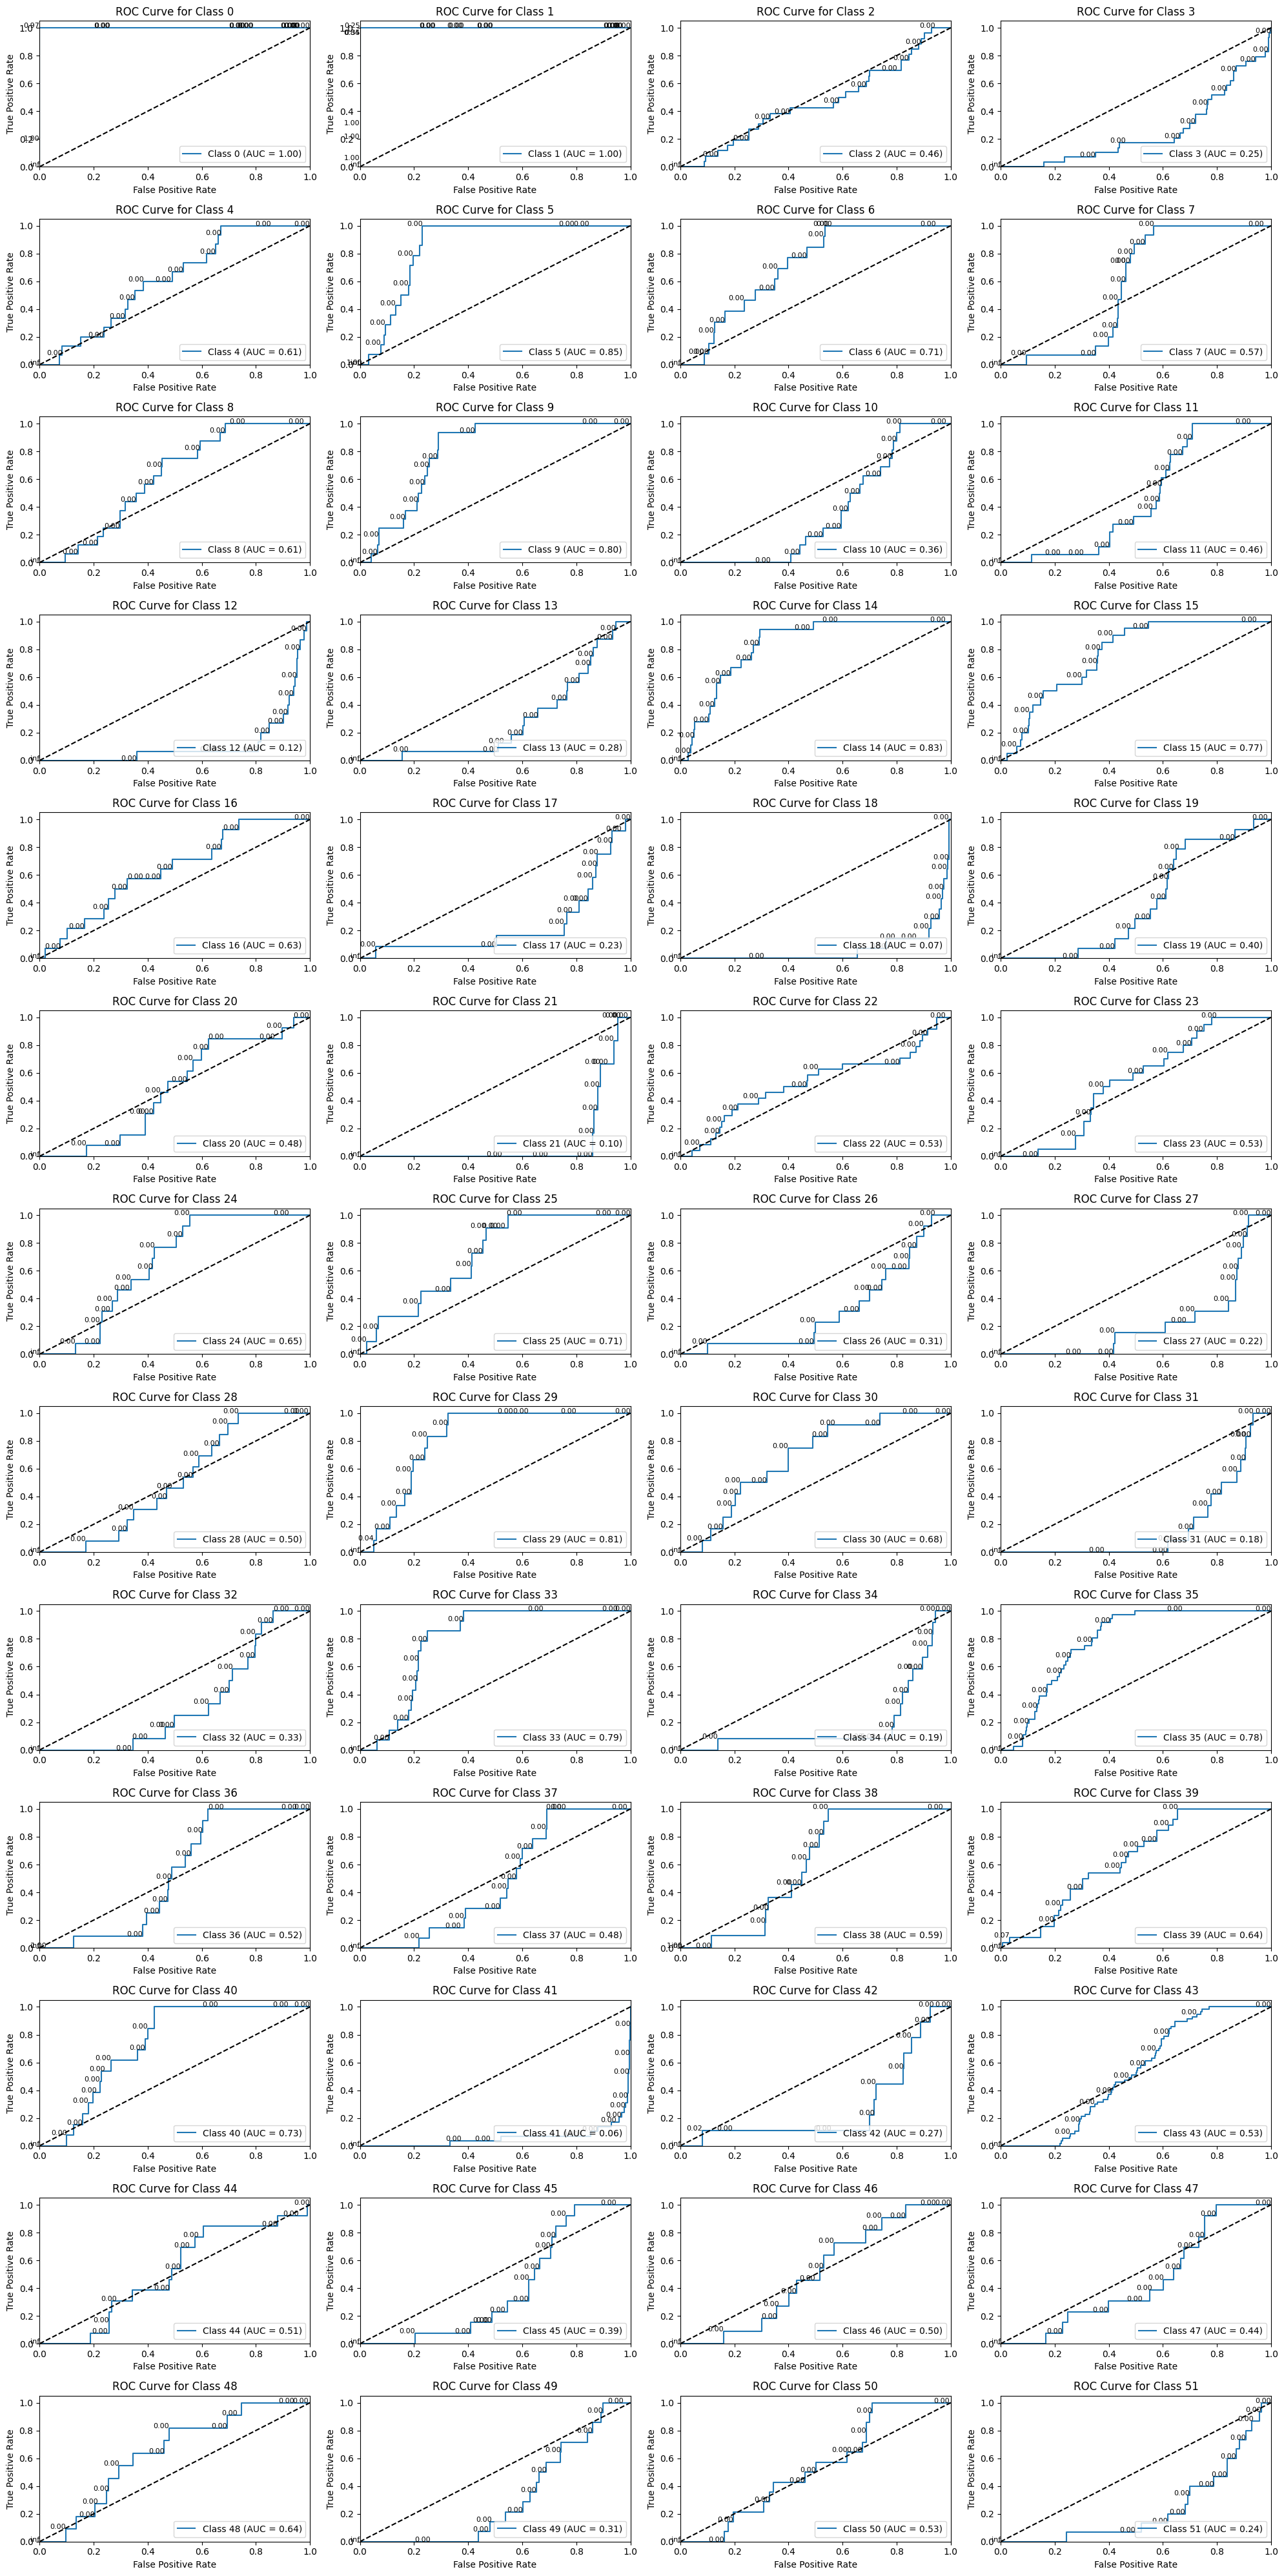

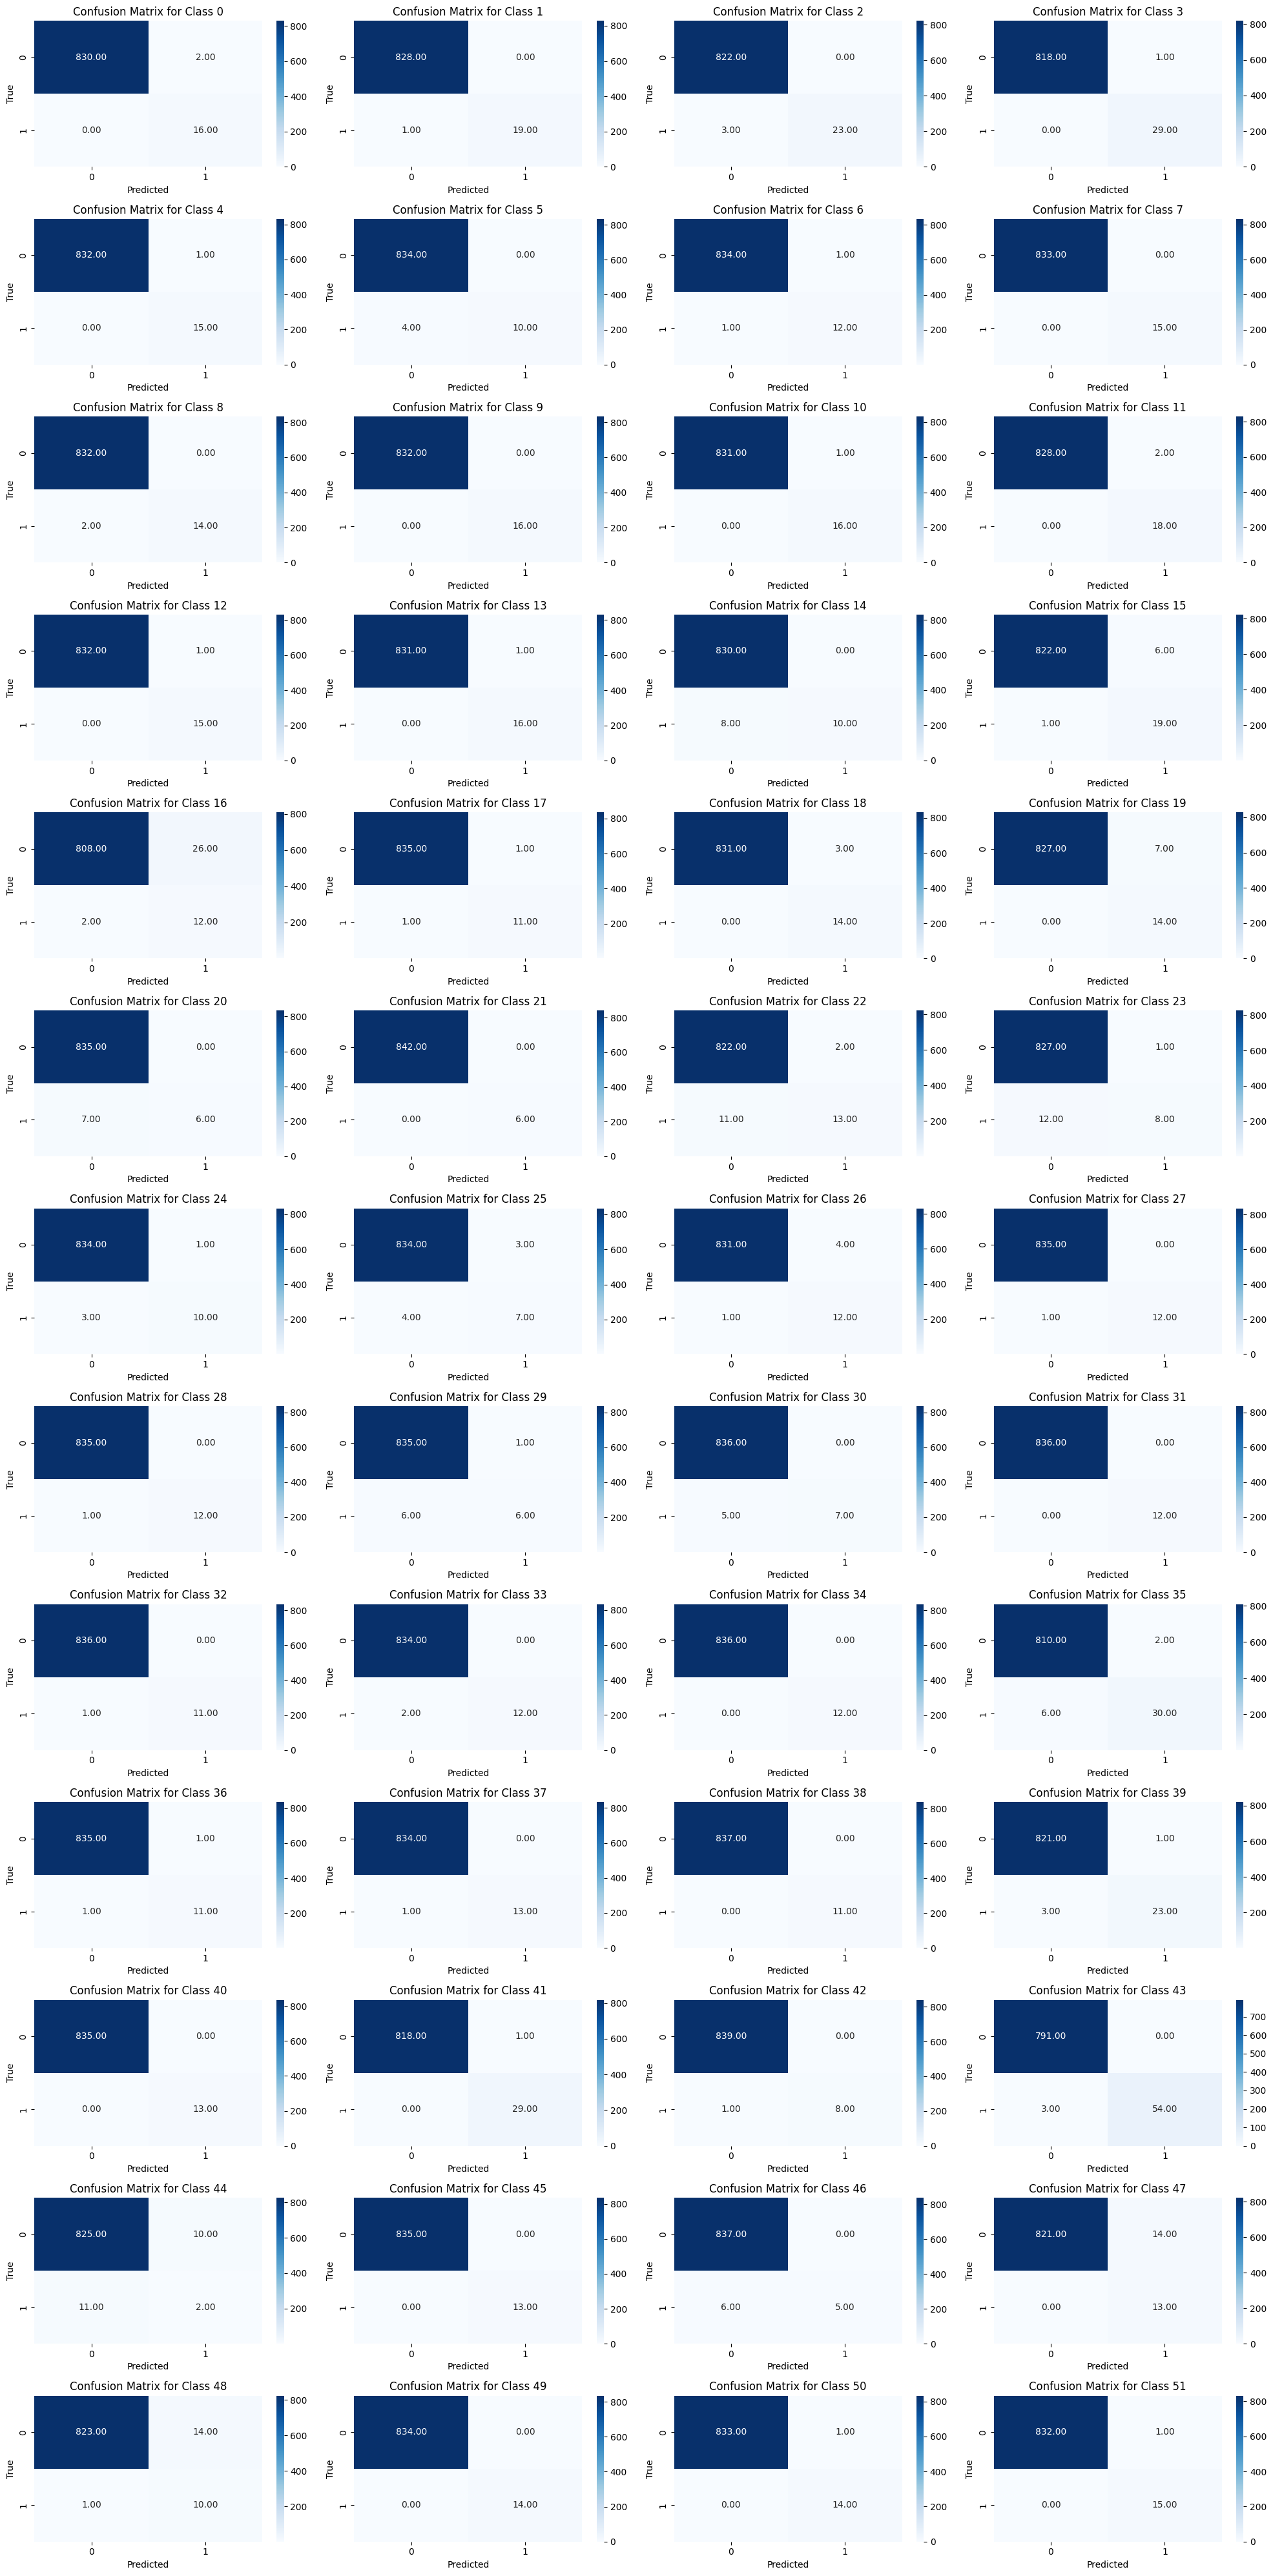

<Figure size 640x480 with 0 Axes>

In [51]:
# Calculate ROC Curve and AUC for each class
y_pred_prob = np.array(model.predict(X_test)) # Convert probabilities to class labels
y_pred_classes = np.array(pred) # True labels in class format
y_true_classes = test_labels
n_classes = y_pred_prob.shape[-1]  # Number of classes
print(n_classes)
  # Number of classes
fpr = dict()
tpr = dict()
roc_auc = dict()


n_rows_cm = 13  # Number of rows for confusion matrices
n_cols_cm = 4  # Number of columns for confusion matrices
fig_cm, axes_cm = plt.subplots(n_rows_cm, n_cols_cm, figsize=(20, 40))  # Create a figure with subplots for CM
axes_cm = axes_cm.flatten()  # Flatten the axes array for easy indexing

# Plotting ROC curves in a separate grid
n_rows_roc = 13  # Number of rows for ROC curves
n_cols_roc = 4  # Number of columns for ROC curves
fig_roc, axes_roc = plt.subplots(n_rows_roc, n_cols_roc, figsize=(20, 40))  # Create a figure with subplots for ROC
axes_roc = axes_roc.flatten()  # Flatten the axes array for easy indexing

# Loop through each class and plot both confusion matrix and ROC curve
for i in range(n_classes):
    # Confusion Matrix Subplot
    ax_cm = axes_cm[i]  # Select subplot for confusion matrix
    
    # Get true binary labels and predicted binary labels for the current class
    y_true_binary = (y_true_classes == i).astype(int)  # True binary labels for current class
    y_pred_binary = (y_pred_classes == i).astype(int)  # Predicted binary labels for current class

    # Confusion Matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)

    
    # Plot confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1], ax=ax_cm)
    ax_cm.set_title(f'Confusion Matrix for Class {i}')
    ax_cm.set_xlabel('Predicted')
    ax_cm.set_ylabel('True')

    # ROC Curve Subplot
    ax_roc = axes_roc[i]  # Select subplot for ROC curve
    
    # Get predicted probabilities for the current class
    y_score_binary = y_pred_prob[:, i]  # Predicted probabilities for current class
    
    # Calculate ROC curve and AUC for the current class
    fpr[i], tpr[i], thresholds = roc_curve(y_true_binary, y_score_binary)
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for the current class
    ax_roc.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    for j in range(0, len(thresholds), max(1, len(thresholds) // 10)): 
       # Annotate at intervals
      ax_roc.text(fpr[i][j], tpr[i][j], f'{thresholds[j]:.2f}', fontsize=8, ha='right')
    ax_roc.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title(f'ROC Curve for Class {i}')
    ax_roc.legend(loc='lower right')

# Adjust layout to prevent overlap
fig_cm.tight_layout()
fig_roc.tight_layout()

# Show the confusion matrix and ROC curve plots
plt.figure(fig_cm.number)
plt.show()

plt.figure(fig_roc.number)
plt.show()



## Calculation of classwise Accuracy

In [53]:
classes = np.unique(y_true_classes)  # Get all unique classes
classwise_accuracy = {}

# Calculate class-wise accuracy
for class_label in classes:
    # Identify the indices where the true label is equal to the class label
    class_indices = np.where(y_true_classes == class_label)
    
    
    # Get the true labels and predictions for that class
    true_labels_class = y_true_classes[class_indices]
   

    pred_labels_class = y_pred_classes[class_indices]
  
    
    # Calculate the accuracy for that class
    class_accuracy = accuracy_score(true_labels_class, pred_labels_class)
    
    # Store in the dictionary
    classwise_accuracy[class_label] = class_accuracy

# Print class-wise accuracies
for class_label, accuracy in classwise_accuracy.items():
    print(f"Class {class_label} Accuracy: {accuracy:.4f}")

Class 0.0 Accuracy: 1.0000
Class 1.0 Accuracy: 0.9500
Class 2.0 Accuracy: 0.8846
Class 3.0 Accuracy: 1.0000
Class 4.0 Accuracy: 1.0000
Class 5.0 Accuracy: 0.7143
Class 6.0 Accuracy: 0.9231
Class 7.0 Accuracy: 1.0000
Class 8.0 Accuracy: 0.8750
Class 9.0 Accuracy: 1.0000
Class 10.0 Accuracy: 1.0000
Class 11.0 Accuracy: 1.0000
Class 12.0 Accuracy: 1.0000
Class 13.0 Accuracy: 1.0000
Class 14.0 Accuracy: 0.5556
Class 15.0 Accuracy: 0.9500
Class 16.0 Accuracy: 0.8571
Class 17.0 Accuracy: 0.9167
Class 18.0 Accuracy: 1.0000
Class 19.0 Accuracy: 1.0000
Class 20.0 Accuracy: 0.4615
Class 21.0 Accuracy: 1.0000
Class 22.0 Accuracy: 0.5417
Class 23.0 Accuracy: 0.4000
Class 24.0 Accuracy: 0.7692
Class 25.0 Accuracy: 0.6364
Class 26.0 Accuracy: 0.9231
Class 27.0 Accuracy: 0.9231
Class 28.0 Accuracy: 0.9231
Class 29.0 Accuracy: 0.5000
Class 30.0 Accuracy: 0.5833
Class 31.0 Accuracy: 1.0000
Class 32.0 Accuracy: 0.9167
Class 33.0 Accuracy: 0.8571
Class 34.0 Accuracy: 1.0000
Class 35.0 Accuracy: 0.8333
Cl

## Plotting a single ROC for all classes

/var/folders/20/hwsvjxys13vdjtgrj5x3dxrc0000gn/T/ipykernel_31808/3656211722.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


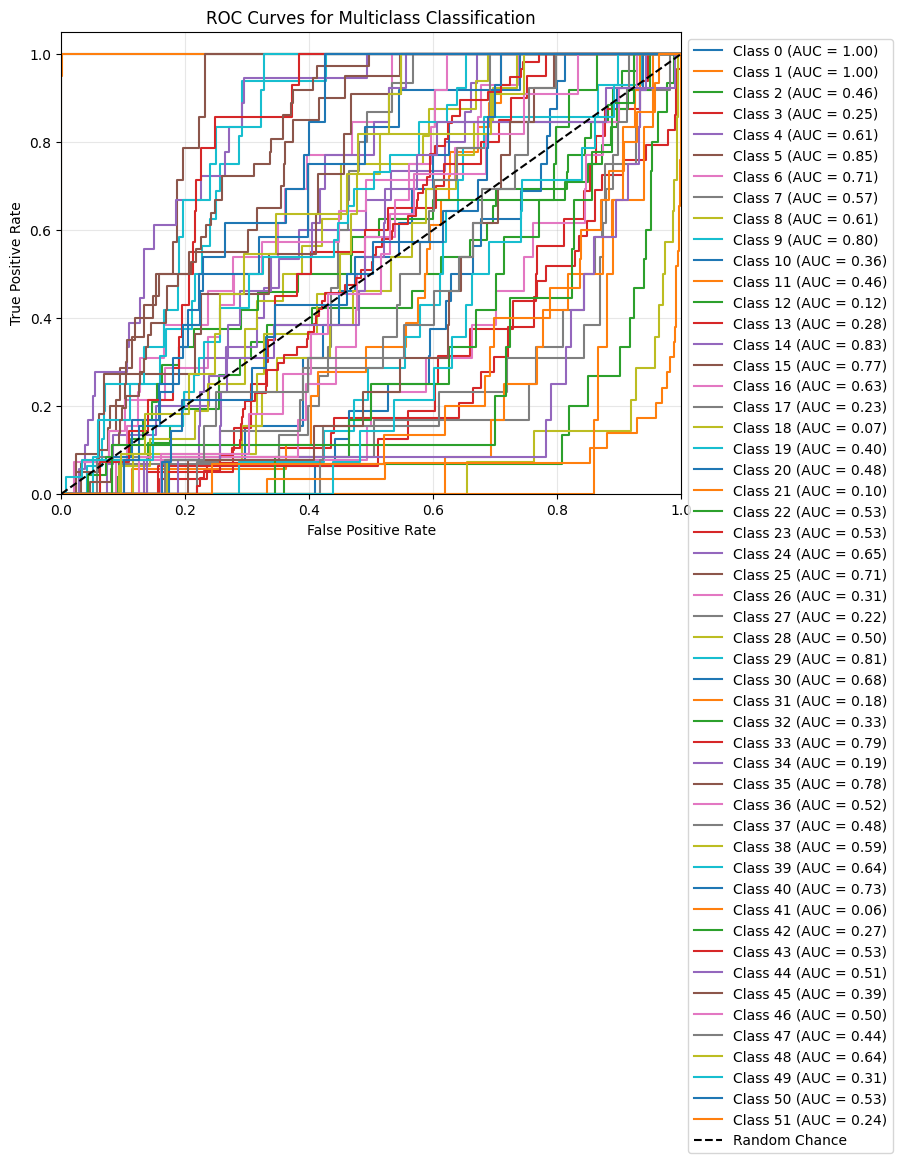

In [63]:
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    # Annotate thresholds at intervals


# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Configure the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

## Visualization of Model Predictions on Validation Data

Validation Batch:
val_images, val_labels = test_dataset.next(): Retrieves a batch of validation images and labels from the test dataset.

Predictions:
predicted = model.predict(val_images): Uses the trained model to predict class probabilities for the validation batch.

predicts = map_pred(np.argmax(predicted, axis=-1)): Maps the predicted class indices to traffic sign labels using the map_pred function.

labels = map_pred(np.argmax(val_labels, axis=-1)): Maps the true class indices to traffic sign labels.

Visualization in Subplot Grid:
Generates a 3x4 subplot grid to display images along with their actual and predicted labels.

If the prediction is correct, the title is displayed in green. If predicted incorrectly, it will be displayed in red.

With the use of this visualization, we may can evaluate the model's performance on specific photos from the validation dataset and get insight into both its advantages and disadvantages.

4/4 [==============================] - 0s 66ms/step


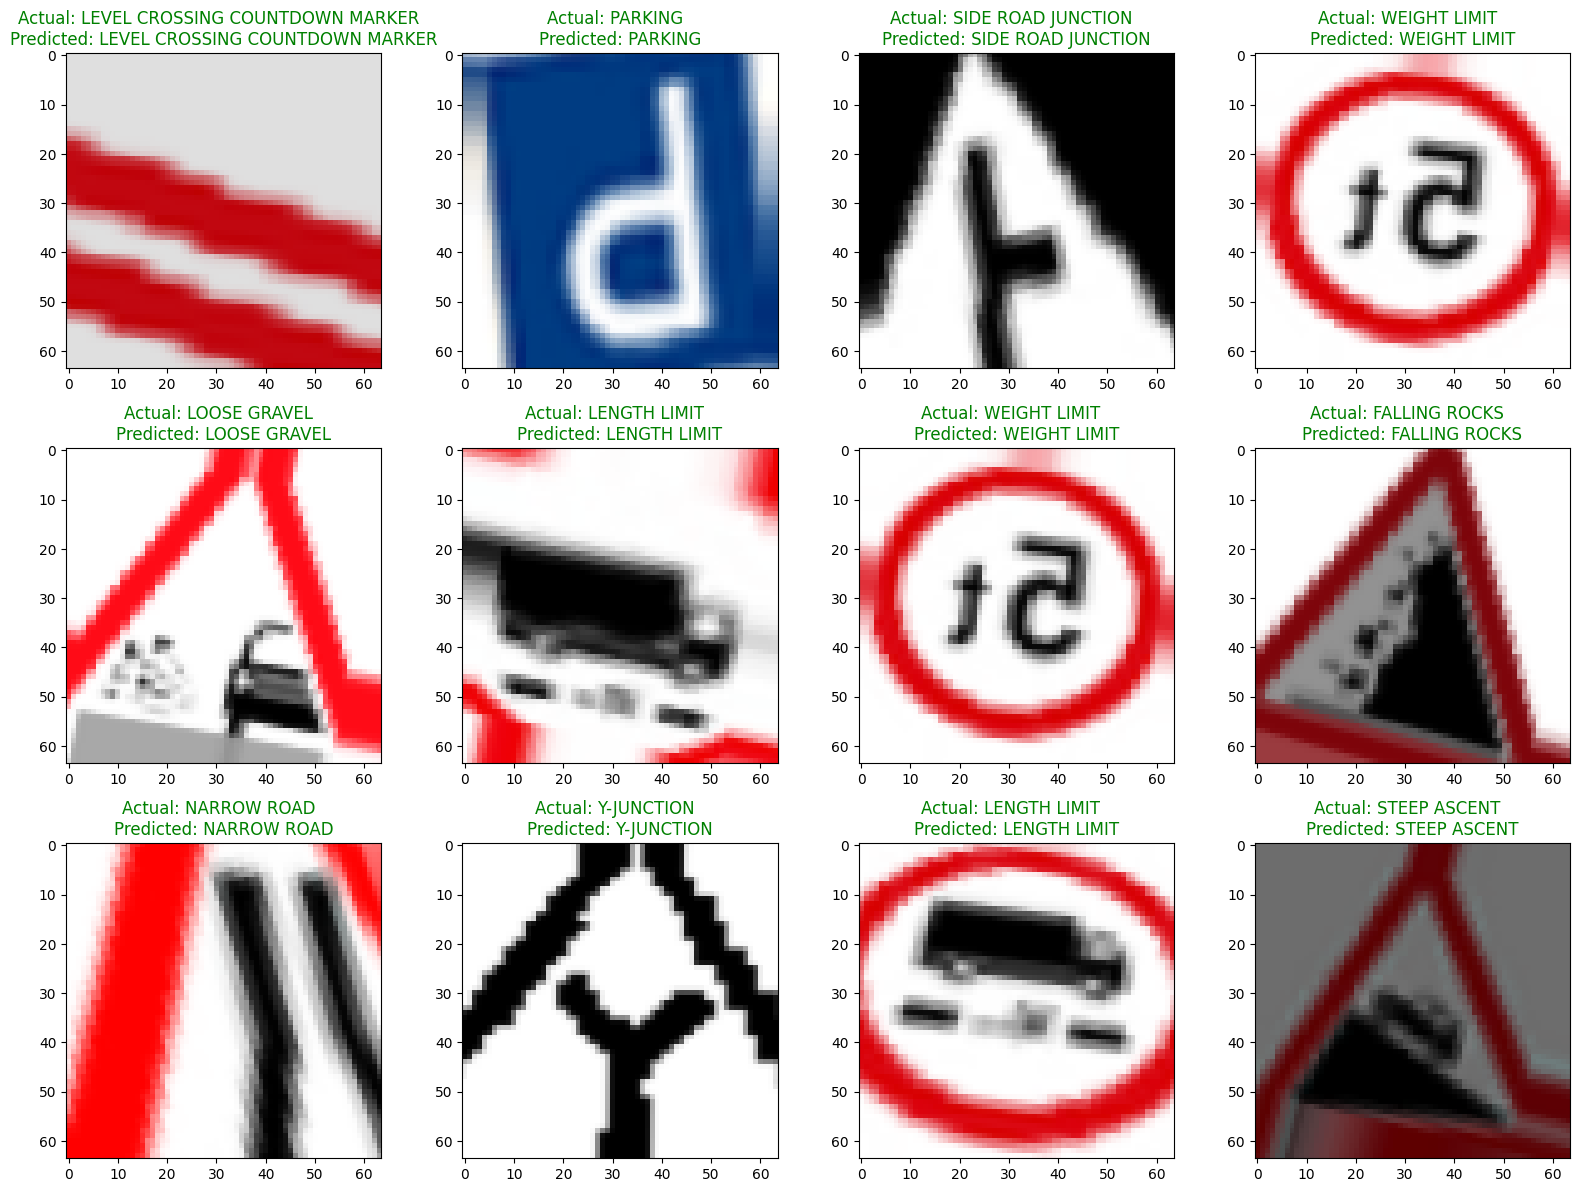

In [18]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()

# INCEPTION V3- BASED MODEL ARCHITECTURE

## Loading InceptionV3 Pre-trained Model


### InceptionV3 Model Initialization:

Using the InceptionV3 class from Keras's applications module, the code initializes the pre-trained InceptionV3 model.

weights='imagenet: Indicates that weights that have already been learned on the ImageNet dataset should be put into the model.

include_top=False: Excludes the top layers of the model, which are completely integrated, as we want to add customized layers for traffic sign detection.

input_shape=(inception_height, inception_width, 3): Specifies the form of the input photos that the model expects. It is set to (75, 75, 3) in this instance.

### Freezing Pre-trained Layers:

base_model.trainable = False: Freezes the InceptionV3 model's pre-trained layers' weights. This implies that only the custom layers that are introduced later will be trained, and these layers will not be modified throughout the training process.

This code block uses InceptionV3 as a feature extractor and prevents the alteration of its pre-trained weights, laying the groundwork for the transfer learning process.

In [19]:

# Load InceptionV3 pre-trained on ImageNet
inception_height = 75
inception_width = 75
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(inception_height, inception_width, 3))
base_model.trainable = False

## InceptionV3-Based Model Architecture

**Sequential Model Composition**:

**incept_model** = tf.keras.Sequential([...]): Using the Keras Sequential API, defines a sequential model in which layers are added one after the other.

**InceptionV3 Base Model Inclusion:**

**base_model**: The basis model is the InceptionV3 model that was loaded in the previous code block. By extracting structural characteristics from input photos, this model functions as a feature extractor.

**Global Average Pooling Layer**:

**keras.layers.GlobalAveragePooling2D():** Over the input feature map's dimensions, it performs global average pooling. By reducing all of the dimensions to a 1x1 scale, the obtained characteristics are efficiently summarized.
Dropout Layer:

**keras.layers.Dropout(0.5):** introduces dropout regularization at a rate of 0.5, which prevents overfitting by randomly assigning a portion of input units to zero during training.

**Dense Layer (Hidden Layer):**

**keras.layers.Dense(256, activation='relu'):** Includes a 256-unit densely linked layer with a ReLU activation function. The global average pooling's summary characteristics are processed in this layer.

**Batch Normalization Layer:**

**keras.layers.BatchNormalization():** Improves training stability and speeds up convergence by normalizing and scaling the hidden layer activations.

**Dropout Layer (Regularization):**

**keras.layers.Dropout(rate=0.3):** Introduces more dropout regularization to the model at a rate of 0.3 in order to mitigate overfitting.

**Dense Layer (Output Layer):**

**keras.layers.Dense(43, activation='softmax'):** Generates class probabilities by defining the output layer with 43 units—one for each type of traffic sign—and the softmax activation function.

**Model Summary:**

**incept_model.summary():** Gives an overview of the model architecture, displaying the number of trainable parameters, the overall number of parameters, and the kinds and forms of each layer.

The InceptionV3-based model architecture for traffic sign identification is put together by this code block, which adds custom layers to the pre-trained InceptionV3 basis.



In [20]:
incept_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.5),
                                   keras.layers.Dense(256, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.3),
                                   keras.layers.Dense(52, activation='softmax')
                                ])
incept_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 batch_normalization_98 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_5 (Dropout)         (None, 256)              

## Image Data Generation for Training and Testing


**Image Data Generators:**
**train_datagen and test_datagen:** Instances of ImageDataGenerator from Keras, used for real-time data augmentation during training.

**Data Rescaling:**
rescale=1./255: Adjusts picture pixel values to fall between [0, 1]. During training, normalizing the data facilitates convergence.

**Validation Split:**
**validation_split=0.2:** Indicates a 20% validation split for the training dataset.

**Flow from Directory:**
**flow_from_directory:** Generates batches of augmented/normalized data from image files in a directory.


**train_path:** Path to the directory containing the training images.
**target_size=(inception_height, inception_width):** Resizes images to the specified height and width.
**batch_size:** Number of samples per batch.
**class_mode='categorical':** Utilizes categorical encoding for class labels.
**shuffle=True:** Shuffles the data at the end of each epoch.
**seed:** Seed for randomization to ensure reproducibility.
**color_mode='rgb':** Specifies RGB color mode for the images.
**interpolation='hamming':** Interpolation method for resizing.


**Subset for Training and Validation:**

**subset='training and subset='validation:** Split the dataset into subgroups for training and validation according on the given split.


In order to enable successful and efficient learning, these generators are essential for providing batches of augmented and normalized pictures to the model during training and validation.

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(inception_height, inception_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(train_path,
                                                target_size=(inception_height, inception_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')
print(len(train_dataset))

Found 10155 images belonging to 52 classes.
Found 2510 images belonging to 52 classes.
102


**Model Compilation and Training Configuration**

**Learning Rate and Epochs Configuration:**

**alpha = 0.001:** Sets the speed at which the Adam optimizer learns. During optimization, the step size is determined by the learning rate.
**epochs = 15:** Specifies how many training epochs there are. One whole run through the whole training dataset is referred to as an epoch.
**Adam Optimizer Initialization:**
optim = keras.optimizers.Adam(learning_rate=alpha): Sets the learning rate at which the Adam optimizer is initialized.

**Model Compilation:**

**incept_model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy']):** Compiles the model for training.
**optimizer:** The configured Adam optimizer.
**loss='categorical_crossentropy':** Categorical crossentropy is chosen as the loss function for multi-class classification problems.
***metrics=['accuracy']:** During training and evaluation, accuracy is used as a metric to monitor the model's performance.

This code block configures the optimizer, loss function, and evaluation metric, readying the model for training. Model performance and the training process are affected by the chosen learning rate and number of epochs.

In [22]:
alpha=0.0001
epochs=15
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
incept_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Model Training
**Model Training Process:** train_dataset: The generator providing batches of training data.

**incept_model.fit(...):** Initiates the training process for the compiled InceptionV3-based model.

**steps_per_epoch=len(train_dataset):** Specifies the number of steps (batches) to be processed in each epoch. It is set to the length of the training dataset divided by the batch size.
**epochs=15:** The number of complete passes through the training dataset during training. validation_data=test_dataset: The generator providing batches of validation data during training. validation_steps=len(test_dataset): Specifies the number of steps (batches) to be processed from the validation dataset in each epoch. It is set to the length of the validation dataset divided by the batch size.

**Training Output:**

The training process produces the incept_history object, which contains information about the training and validation performance over epochs.
Using the designated generators for training and validation datasets, this code block is in charge of training the InceptionV3-based model. The incept_history object stores the training progress and performance indicators for further analysis and display

In [23]:
incept_history = incept_model.fit(train_dataset,
                            steps_per_epoch=len(train_dataset),
                            epochs=epochs,
                            validation_data=test_dataset,
                            validation_steps=len(test_dataset))

Epoch 1/15
102/102 [==============================] - 21s 182ms/step - loss: 3.9530 - accuracy: 0.1258 - val_loss: 2.7610 - val_accuracy: 0.3255
Epoch 2/15
102/102 [==============================] - 16s 158ms/step - loss: 2.8766 - accuracy: 0.3011 - val_loss: 2.1982 - val_accuracy: 0.4578
Epoch 3/15
102/102 [==============================] - 16s 156ms/step - loss: 2.3733 - accuracy: 0.3934 - val_loss: 1.9092 - val_accuracy: 0.5235
Epoch 4/15
102/102 [==============================] - 16s 155ms/step - loss: 2.0654 - accuracy: 0.4593 - val_loss: 1.7116 - val_accuracy: 0.5797
Epoch 5/15
102/102 [==============================] - 16s 153ms/step - loss: 1.8568 - accuracy: 0.5066 - val_loss: 1.5694 - val_accuracy: 0.6108
Epoch 6/15
102/102 [==============================] - 16s 152ms/step - loss: 1.6817 - accuracy: 0.5498 - val_loss: 1.4643 - val_accuracy: 0.6303
Epoch 7/15
102/102 [==============================] - 16s 157ms/step - loss: 1.5438 - accuracy: 0.5816 - val_loss: 1.3769 - val_ac

## InceptionV3-Based Model Performance Visualization


**Subplots Initialization:**

fig, ax = plt.subplots(1, 2): Initializes a figure with one row and two columns of subplots.
fig.set_size_inches(16, 12): Sets the size of the figure.

**Performance DataFrame:**

performance = pd.DataFrame(incept_history.history): Converts the training history of the InceptionV3 model into a Pandas DataFrame for easy manipulation.
Loss Plotting:

ax[1].plot(performance[['loss', 'val_loss']]): Plots the training loss and validation loss over epochs.
ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the subplot.
ax[1].set_title('InceptionV3 Model Loss'): Sets the title for the loss subplot.
ax[1].set_xlabel('Epochs') and ax[1].set_ylabel('Loss'): Sets labels for the x-axis and y-axis, respectively.


**Accuracy Plotting:**

ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots the training accuracy and validation accuracy over epochs.
ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the subplot.
ax[0].set_title('InceptionV3 Model Accuracy'): Sets the title for the accuracy subplot.
ax[0].set_xlabel('Epochs') and ax[0].set_ylabel('Accuracy'): Sets labels for the x-axis and y-axis, respectively.
Figure Title:

fig.suptitle('InceptionV3 Performance'): Sets the overall title for the entire figure.
Displaying the Plots:

plt.show(): Displays the figure with the subplots, showing the training and validation performance of the InceptionV3-based model.

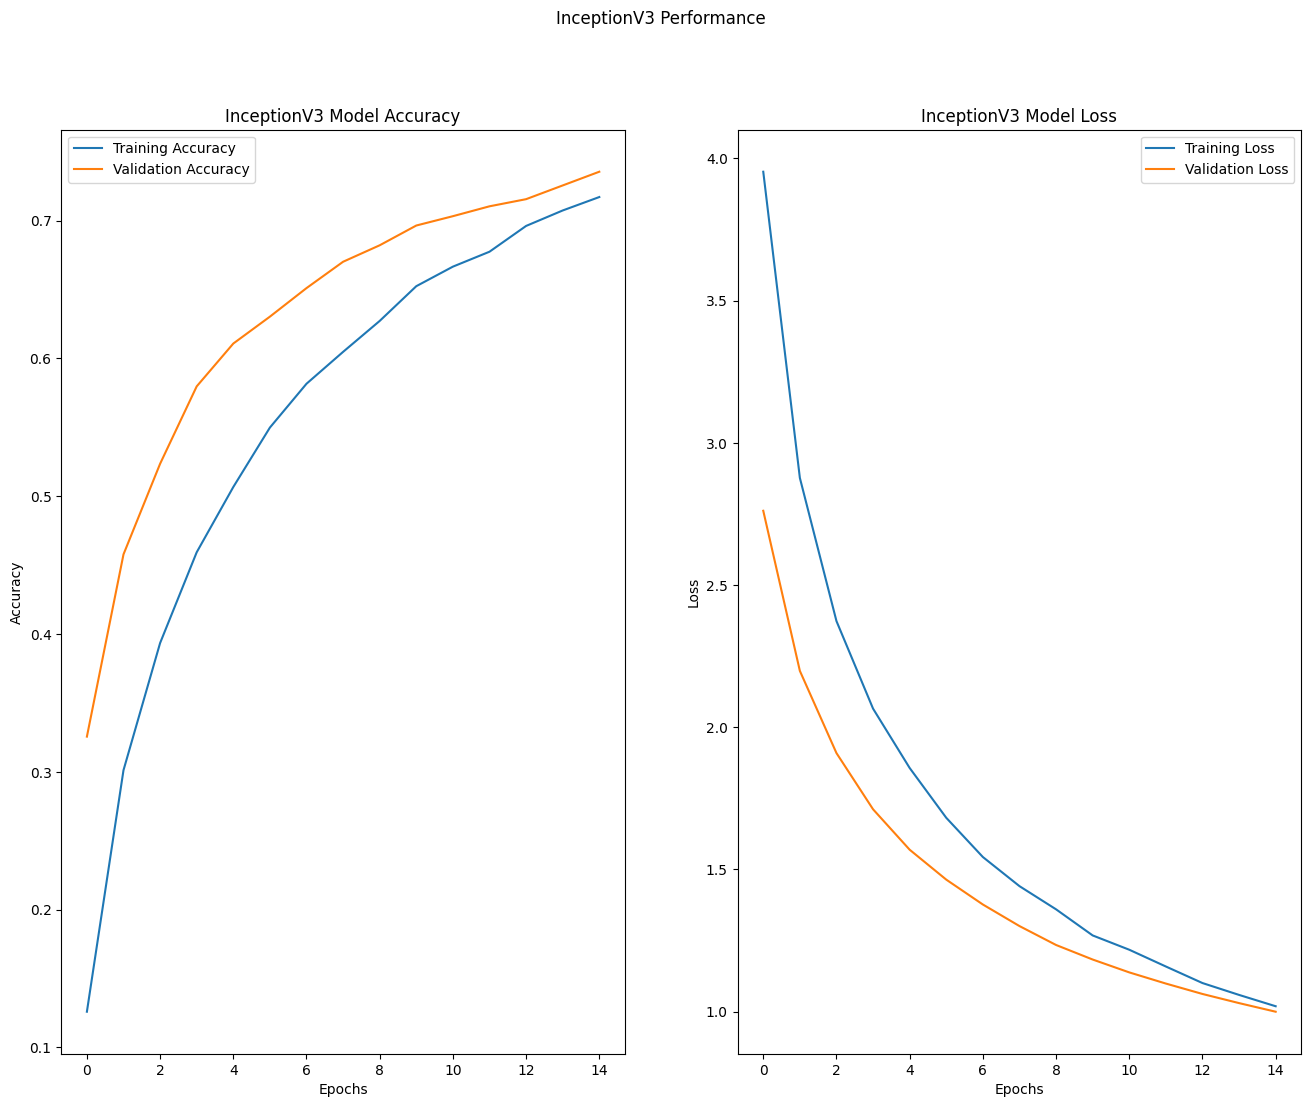

<Figure size 1000x700 with 0 Axes>

In [24]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(incept_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('InceptionV3 Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('InceptionV3 Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('InceptionV3 Performance')
plt.show()

## Mapping Predictions for InceptionV3 Model



Function for Mapping Predictions:

**def map_pred_inception(pred):** Defines a function to map predicted class indices to their corresponding traffic sign labels for the InceptionV3 model

**Loading Test Data for Inference:**

**test_df** = pd.read_csv(data_dir + 'GT-final_test.csv', delimiter=*';'): Reads the test dataset CSV file containing information about the test images.

**test_labels** = test_df["ClassId"].values: Extracts the true class labels of the test images. imgs = test_df["Filename"].*values: Extracts the filenames of the test images.

**Processing Test_Images:**

A loop iterates over the test image filenames. image = cv2.imread(test_path + img): Reads the image using OpenCV. image_fromarray = Image.fromarray(image, 'RGB'): Converts the image from NumPy array format to a PIL Image in RGB mode. resize_image = image_fromarray.resize((inception_height, inception_width)): Resizes the image to the input dimensions expected by the InceptionV3 model. data_inception.append(np.array(resize_image)): Appends the processed image as a NumPy array to the data_inception list.

**Data_Normalization:**

X_test_incept = np.array(data_inception): Converts the list of processed images to a NumPy array. X_test_incept = X_test_incept / 255: Normalizes the pixel values of the images.

The test data is ready for analyzing using the trained InceptionV3-based model. It analyzes the test pictures, normalizes the pixel values for inference, and reads the information from the test dataset. the range [0, 1].

In [25]:
def map_pred_inception(pred):
    return [int(list(train_dataset.class_indices.keys())[i]) for i in pred]

    
test_labels = np.array([])
imgs = np.array([])
    
for filename in os.listdir(test_path):
    
    if filename[0:2] != ".D":

        i = np.array(int(filename[0:2]))
        test_labels = np.append(test_labels , i)
        imgs = np.append(imgs,filename)

data_inception = []
for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((inception_height, inception_width))
        data_inception.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test_incept = np.array(data_inception)
X_test_incept = X_test_incept/255

## Evaluating InceptionV3-Based Model on Test Data

**Importing Necessary Library:**

from sklearn.metrics import accuracy_score: Imports the accuracy_score function from scikit-learn, which will be used to calculate the accuracy of the model.

**Model Inference:**
**pred_incept** = incept_model.predict(X_test_incept): Performs predictions on the preprocessed test data using the trained InceptionV3-based model.

**Mapping Predictions:**

**pred_incept** = map_pred_inception(pred_incept.argmax(axis=-1)): Maps the predicted class indices to their corresponding traffic sign labels using the defined map_pred_inception function.

**Accuracy Calculation:**
(accuracy_score(test_labels, pred_incept) * 100): Calculates the accuracy of the model on the test data by comparing the true labels (test_labels) with the predicted labels (pred_incept). The result is multiplied by 100 to express the accuracy in percentage.
Print Accuracy:

print('Test Data accuracy: ', accuracy_score(test_labels, pred_incept) * 100): Prints the accuracy of the InceptionV3-based model on the test data.
This code block publishes the accuracy score after assessing the trained InceptionV3-based model's performance on the test dataset.


In [26]:
from sklearn.metrics import accuracy_score
pred_incept = incept_model.predict(X_test_incept)
pred_incept = map_pred_inception(pred_incept.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred_incept)*100)

27/27 [==============================] - 3s 69ms/step
Test Data accuracy:  56.367924528301884


# MobileNetV2 as Base Model

**MobileNetV2:**
This part of code will initializes the MobileNetV2 model provided by TensorFlow.keras for transfer learning. and take the Input shapes which will height, width and color.

Input Shape
input_shape=(height, width, 3): gives the predicted input shape for the MobileNetV2 model based on the selected width and height. When using RGB color photos, the final dimension is set to 3.

Include Top:
include_top=False: omits the fully linked layers at the top of the MobileNetV2 architecture, as bespoke layers designed for the particular purpose will take their place.

Weights:
weights="imagenet": Loads pre-trained weights from ImageNet. This provides a starting point for the model's parameters.

Freezing Layers:
base_model.trainable = False: sets all of the layers' weights in the MobileNetV2 base model to zero. This implies that just the weights of the newly added custom layers will be trained during fine-tuning, and that these weights will not be modified.


The model may use the expertise from ImageNet by employing an pre-trained MobileNetV2 as a feature extractor, and then tailor the final layers to the particular goal of traffic sign categorization.

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (height, width, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

## MobileNetV2-Based Model Architecture


In [28]:
mob_model = tf.keras.Sequential([base_model,
                                   keras.layers.GlobalAveragePooling2D(),
                                   keras.layers.Dropout(0.2),
                                   keras.layers.Dense(512, activation='relu'),
                                   keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.2),
                                   keras.layers.Dense(52, activation='softmax')
                                ])
mob_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_99 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                      

## Model Compilation for MobileNetV2-Based Model

### Learning Rate:
alpha = 0.01: The learning rate is set to 0.01. The learning rate controls the step size during optimization.

Number of Epochs:
epochs = 8: The model will be trained for 8 epochs.

Optimizer:
optim = keras.optimizers.Adam(learning_rate=alpha): For optimization using the given learning rate, the Adam optimizer is selected.

Model Compilation:
mob_model.compile: Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.
By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch during training, this stage gets the MobileNetV2-based model ready for training.


In [29]:
alpha=0.01
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
mob_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training MobileNetV2-Based Model
Training Data:
train_dataset: The training dataset provided to the fit function.

Steps per Epoch:
steps_per_epoch=len(train_dataset): The number of training dataset steps (batches) that must be processed before going on to the next epoch. The training dataset's length is what it is configured to.

Number of Epochs:
epochs=8: The total number of epochs for which the model will be trained.

Validation Data:
test_dataset: The validation dataset that was used to assess the model's effectiveness at the end of each epoch.

Validation Steps:
validation_steps=len(test_dataset): The quantity of steps (batches) that must be processed at the conclusion of each epoch from the validation dataset.

Training History:
mob_history: Keeps track of the training history, including the accuracy and loss figures for every epoch.

This function starts the MobileNetV2-based model's training process. During each epoch, the model gains knowledge from the training data and is assessed using the validation data. The training log is kept on file for future review.



In [30]:

mob_history = mob_model.fit(train_dataset,
                          steps_per_epoch=len(train_dataset),
                          epochs=epochs,
                          validation_data=test_dataset,
                          validation_steps=len(test_dataset))

Epoch 1/8
102/102 [==============================] - 11s 93ms/step - loss: 1.4642 - accuracy: 0.6246 - val_loss: 1.0992 - val_accuracy: 0.7227
Epoch 2/8
102/102 [==============================] - 7s 69ms/step - loss: 0.7554 - accuracy: 0.7775 - val_loss: 0.9875 - val_accuracy: 0.7243
Epoch 3/8
102/102 [==============================] - 7s 68ms/step - loss: 0.6200 - accuracy: 0.8128 - val_loss: 0.8253 - val_accuracy: 0.7912
Epoch 4/8
102/102 [==============================] - 7s 70ms/step - loss: 0.5073 - accuracy: 0.8430 - val_loss: 0.7893 - val_accuracy: 0.7900
Epoch 5/8
102/102 [==============================] - 7s 69ms/step - loss: 0.4443 - accuracy: 0.8613 - val_loss: 0.7440 - val_accuracy: 0.7996
Epoch 6/8
102/102 [==============================] - 7s 67ms/step - loss: 0.4007 - accuracy: 0.8715 - val_loss: 0.6692 - val_accuracy: 0.8124
Epoch 7/8
102/102 [==============================] - 7s 68ms/step - loss: 0.3986 - accuracy: 0.8712 - val_loss: 0.8193 - val_accuracy: 0.7861
Epoch

## MobileNetV2-Based Model Performance Visualization
Performance DataFrame:
performance = pd.DataFrame(mob_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plotting.

Loss Plot:
ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
ax[1].set_title('Model Loss'): Sets the title for the loss plot.
ax[1].set_xlabel('Epochs'): Sets the x-axis label.
ax[1].set_ylabel('Loss'): Sets the y-axis label.
Accuracy Plot:

ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
ax[0].set_xlabel('Epochs'): Sets the x-axis label.
ax[0].set_ylabel('Accuracy'): Sets the y-axis label.

Overall Title:
fig.suptitle('MobileNetV2 Performance'): Sets an overall title for the entire visualization.
These charts show how effectively the MobileNetV2-based model generalizes to unknown validation data across the training epochs and how well it learns from the training data.



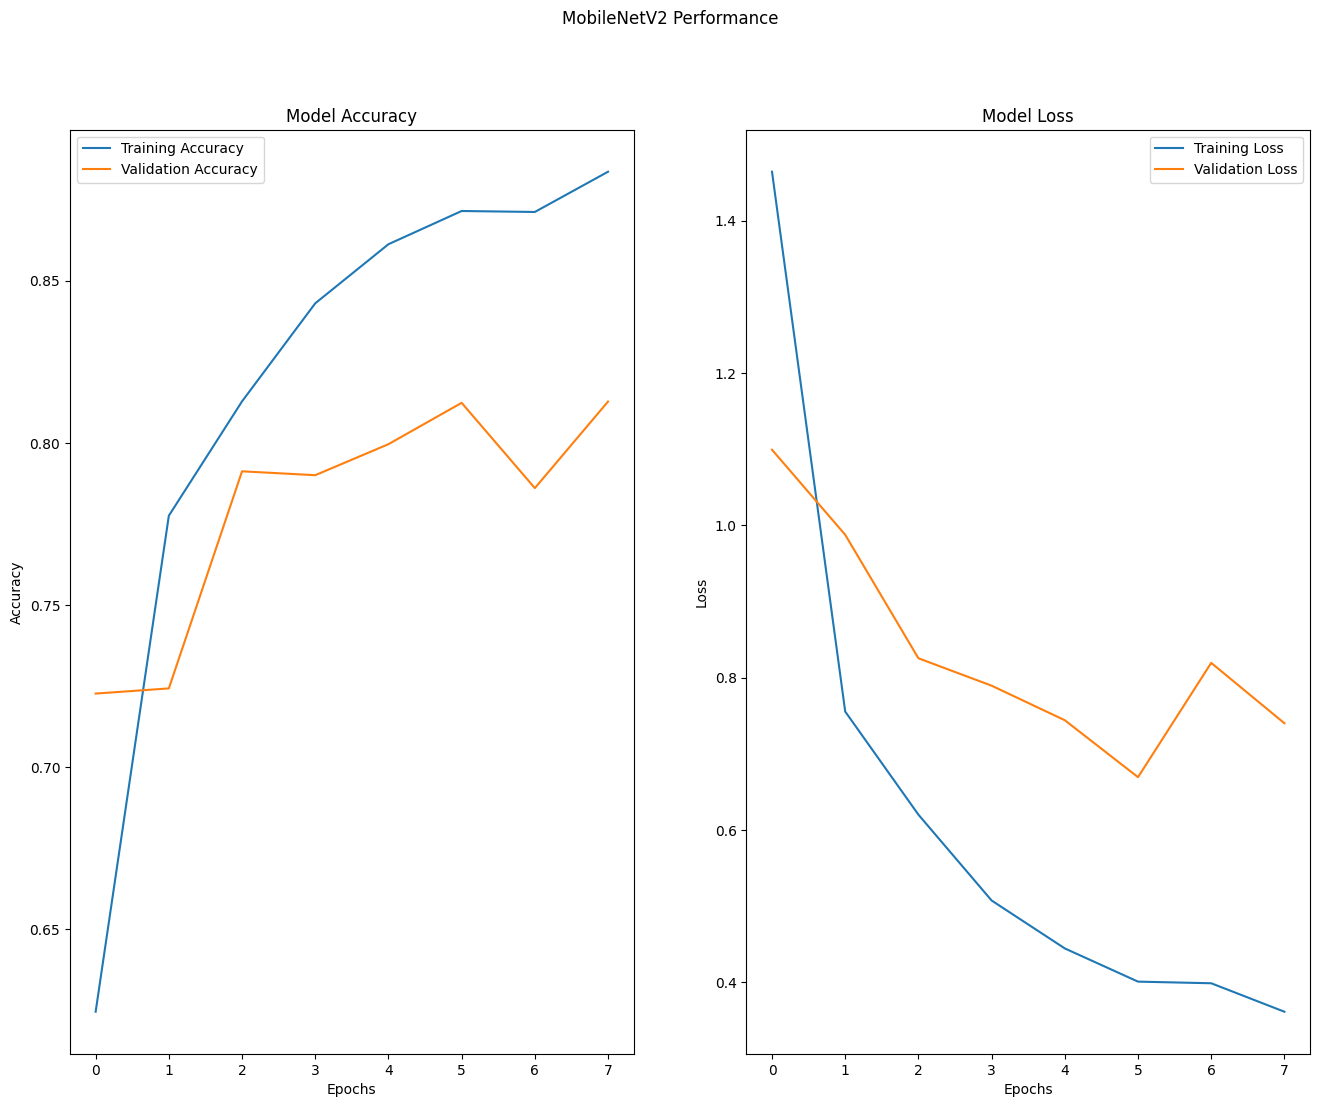

<Figure size 1000x700 with 0 Axes>

In [31]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(mob_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
# ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
# ax[0].set_ylim(0.5,1)
fig.suptitle('MobileNetV2 Performance')
plt.show()

### MobileNetV2-Based Model Evaluation on Test Data

Making Predictions:
The trained MobileNetV2-based model is used to forecast test data's class probabilities.

Mapping Predictions:
Uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.

Accuracy Calculation:
Calculates the accuracy_score function from scikit-learn for the MobileNetV2-based model's predictions on the test data.

Print Accuracy:
Prints the accuracy of the model on the test data.

This offers an assessment measure to evaluate the performance of the MobileNetV2-based model using test data that hasn't been seen before. The accuracy score shows what proportion of traffic sign labels were properly predicted.


In [32]:
from sklearn.metrics import accuracy_score
pred = mob_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

27/27 [==============================] - 2s 45ms/step
Test Data accuracy:  37.735849056603776


# VGG19-Based Model Architecture

Sequential Model:
Sets up a sequential model, in which layers are added one after the other.

VGG19 Base Model:
The foundational model is the VGG19 model. The fully interconnected layers at the top are excluded, and pre-trained weights from ImageNet are used to initialize it.

Batch Normalization Layer:
Implements batch normalization in order to speed up and stabilize the training process.

Flatten Layer:
Reduces the VGG19 basic model's output to a one-dimensional array.

Dense Layer (Hidden):
Adds 512 neurons and sigmoid activation to a thick layer.

Dense Layer (Output):
The output layer for multiclass classification (43 traffic sign classes) has 43 neurons with softmax activation.

Model Summary:
Shows the amount of parameters as well as an overview of the model design.

This model adds more layers to the VGG19 architecture to allow for task-specific fine-tuning. For feature extraction, the VGG19 basic model is employed, and additional custom layers are added for classification.


In [33]:
vgg_model = tf.keras.Sequential([VGG19(weights='imagenet', include_top=False, input_shape=(height,width,3)),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='sigmoid'),
                                 keras.layers.Dense(52, activation='softmax')
                                ])

vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 batch_normalization_100 (B  (None, 2, 2, 512)         2048      
 atchNormalization)                                              
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 52)                26676     
                                                                 
Total params: 21102196 (80.50 MB)
Trainable params: 21101172 (80.49 MB)
Non-trainable params: 1024 (4.00 KB)
___________

In [34]:
alpha=0.0001
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Model Compilation for VGG19-Based Model

Learning Rate:
The value of 0.0001 is the learning rate. During optimization, the step size is governed by the learning rate.

Number of Epochs:
The model will be trained for 8 epochs.

Optimizer
For optimization using the given learning rate, the Adam optimizer is selected.

Model Compilation:
Sets up the model for instruction. The optimizer, evaluation measure ('accuracy'), and loss function ('categorical_crossentropy' for multi-class classification) are all configured.

By defining how the model should learn from the data, what loss function to minimize, and what metrics to watch during training, this phase gets the VGG19-based model ready for training.


In [35]:
alpha=0.0001
epochs=8
optim = keras.optimizers.legacy.Adam(learning_rate=alpha)
vgg_model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training VGG19-Based Model

Training Data:
train_dataset: The training dataset provided to the fit function.

Steps per Epoch:
steps_per_epoch=len(train_dataset): The number of training dataset steps (batches) that must be processed before going on to the next epoch. The training dataset's length is what it is configured to.

Number of Epochs:
epochs=8: The total amount of training epochs that the model will go through.

Validation Data:
test_dataset: The validation dataset that was used to assess the model's effectiveness at the end of each epoch.

Validation Steps:
The quantity of steps (batches) that must be processed at the conclusion of each epoch from the validation dataset.

Training History:
vgg_history: Keeps track of the training history, including the accuracy and loss figures for every epoch.

For the VGG19-based model, this function starts the training process. During each epoch, the model gains knowledge from the training data and is assessed using the validation data. The training log is kept on file for future review.

In [36]:
print(train_dataset)
vgg_history = vgg_model.fit(train_dataset,
                        steps_per_epoch=len(train_dataset),
                        epochs=epochs,
                        validation_data=test_dataset,
                        validation_steps=len(test_dataset))

Epoch 1/8
102/102 [==============================] - 102s 991ms/step - loss: 1.0299 - accuracy: 0.7963 - val_loss: 0.8427 - val_accuracy: 0.9570
Epoch 2/8
102/102 [==============================] - 107s 1s/step - loss: 0.0854 - accuracy: 0.9865 - val_loss: 0.3147 - val_accuracy: 0.9725
Epoch 3/8
102/102 [==============================] - 108s 1s/step - loss: 0.0418 - accuracy: 0.9929 - val_loss: 0.1725 - val_accuracy: 0.9677
Epoch 4/8
102/102 [==============================] - 109s 1s/step - loss: 0.0176 - accuracy: 0.9979 - val_loss: 0.0755 - val_accuracy: 0.9849
Epoch 5/8
102/102 [==============================] - 128s 1s/step - loss: 0.0353 - accuracy: 0.9930 - val_loss: 0.1327 - val_accuracy: 0.9685
Epoch 6/8
102/102 [==============================] - 129s 1s/step - loss: 0.0539 - accuracy: 0.9879 - val_loss: 0.0935 - val_accuracy: 0.9745
Epoch 7/8
102/102 [==============================] - 123s 1s/step - loss: 0.0162 - accuracy: 0.9972 - val_loss: 0.0521 - val_accuracy: 0.9888
Epo

### VGG19-Based Model Performance Visualization

Performance DataFrame:
performance = pd.DataFrame(vgg_history.history): Converts the training history (loss and accuracy values for each epoch) into a Pandas DataFrame for easy plottingLoss Plot:

Loss Plot:
ax[1].plot(performance[['loss', 'val_loss']]): Plots training and validation loss over epochs.
ax[1].legend(['Training Loss', 'Validation Loss']): Adds a legend to the loss plot.
ax[1].set_title('Model Loss'): Sets the title for the loss plot.
ax[1].set_xlabel('Epochs'): Sets the x-axis label.
ax[1].set_ylabel('Loss'): Sets the y-axis label.
ax[1].set_ylim(0, 1): Sets the y-axis limit to improve visualization.

Accuracy Plot:
ax[0].plot(performance[['accuracy', 'val_accuracy']]): Plots training and validation accuracy over epochs.
ax[0].legend(['Training Accuracy', 'Validation Accuracy']): Adds a legend to the accuracy plot.
ax[0].set_title('Model Accuracy'): Sets the title for the accuracy plot.
ax[0].set_xlabel('Epochs'): Sets the x-axis label.
ax[0].set_ylabel('Accuracy'): Sets the y-axis label.
ax[0].set_ylim(0.5, 1): Sets the y-axis limit to improve visualization.

Overall Title:
fig.suptitle('VGG19 Performance'): Sets an overall title for the entire visualization.


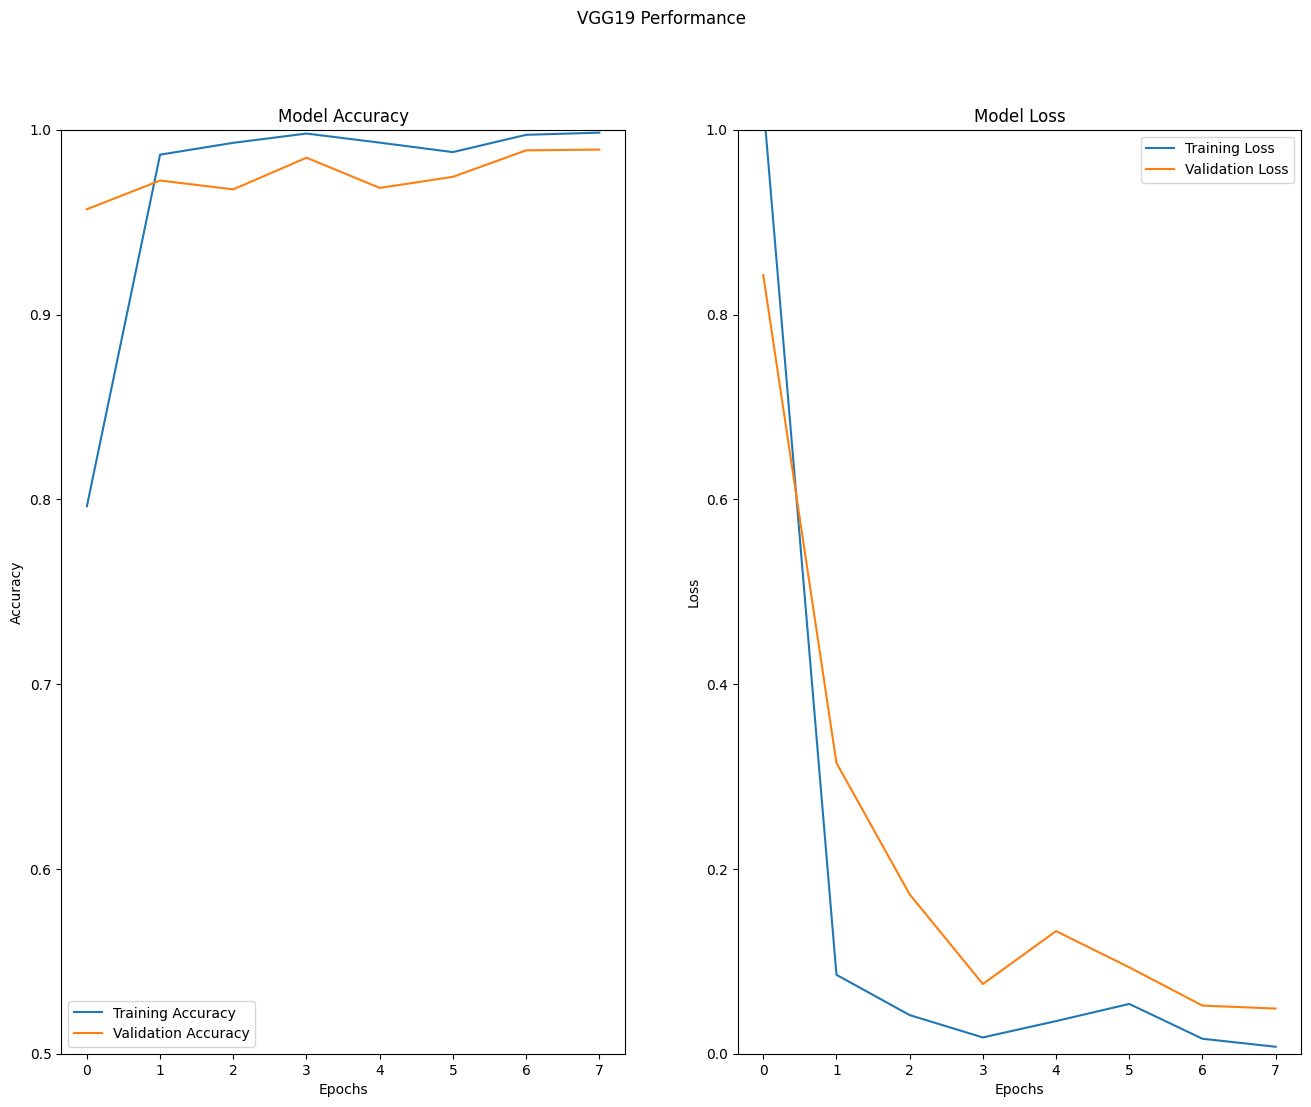

<Figure size 1000x700 with 0 Axes>

In [37]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('VGG19 Performance')
plt.show()

## VGG19-Based Model Evaluation on Test Data
The code block makes predictions on the test data using the trained VGG19-based model and assesses how accurate they are.

Making Predictions: Makes use of the learned VGG19-based model to forecast test data class probabilities.

Mapping Predictions: Uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.

Accuracy Calculation: computes the accuracy_score function from scikit-learn for the VGG19-based model's predictions on the test data.

Print Accuracy: prints the model's accuracy based on the test data.

This offers a score for evaluating how effectively the VGG19-based model functions using test data that hasn't been seen yet. The accuracy score shows what proportion of traffic sign labels were properly anticipated.

In [38]:

from sklearn.metrics import accuracy_score
pred = vgg_model.predict(X_test)
pred = map_pred(pred.argmax(axis=-1))
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

27/27 [==============================] - 2s 65ms/step
Test Data accuracy:  95.87264150943396


## Visualizing VGG19 Model Predictions on Validation Data

Using a batch of validation data, the code block creates a representation of the VGG19 model predictions.

Validation Data Batch: Takes an array of validation photos and labels from the test dataset.

Model Predictions: Makes use of the learned VGG19-based model to calculate the validation pictures' class probabilities.

Mapping Predictions: uses the map_pred function to map the anticipated class indices to the labels of the associated traffic signs.

Display Images: Shows the photos with both the expected and actual labels. The title appears in green if the forecast is accurate, and in red otherwise.

By evaluating the actual and expected labels, this image helps in evaluating how effectively the VGG19-based model is working with the validation data. Correct forecasts are shown by green titles, and wrong predictions are indicated by red titles.

4/4 [==============================] - 1s 116ms/step


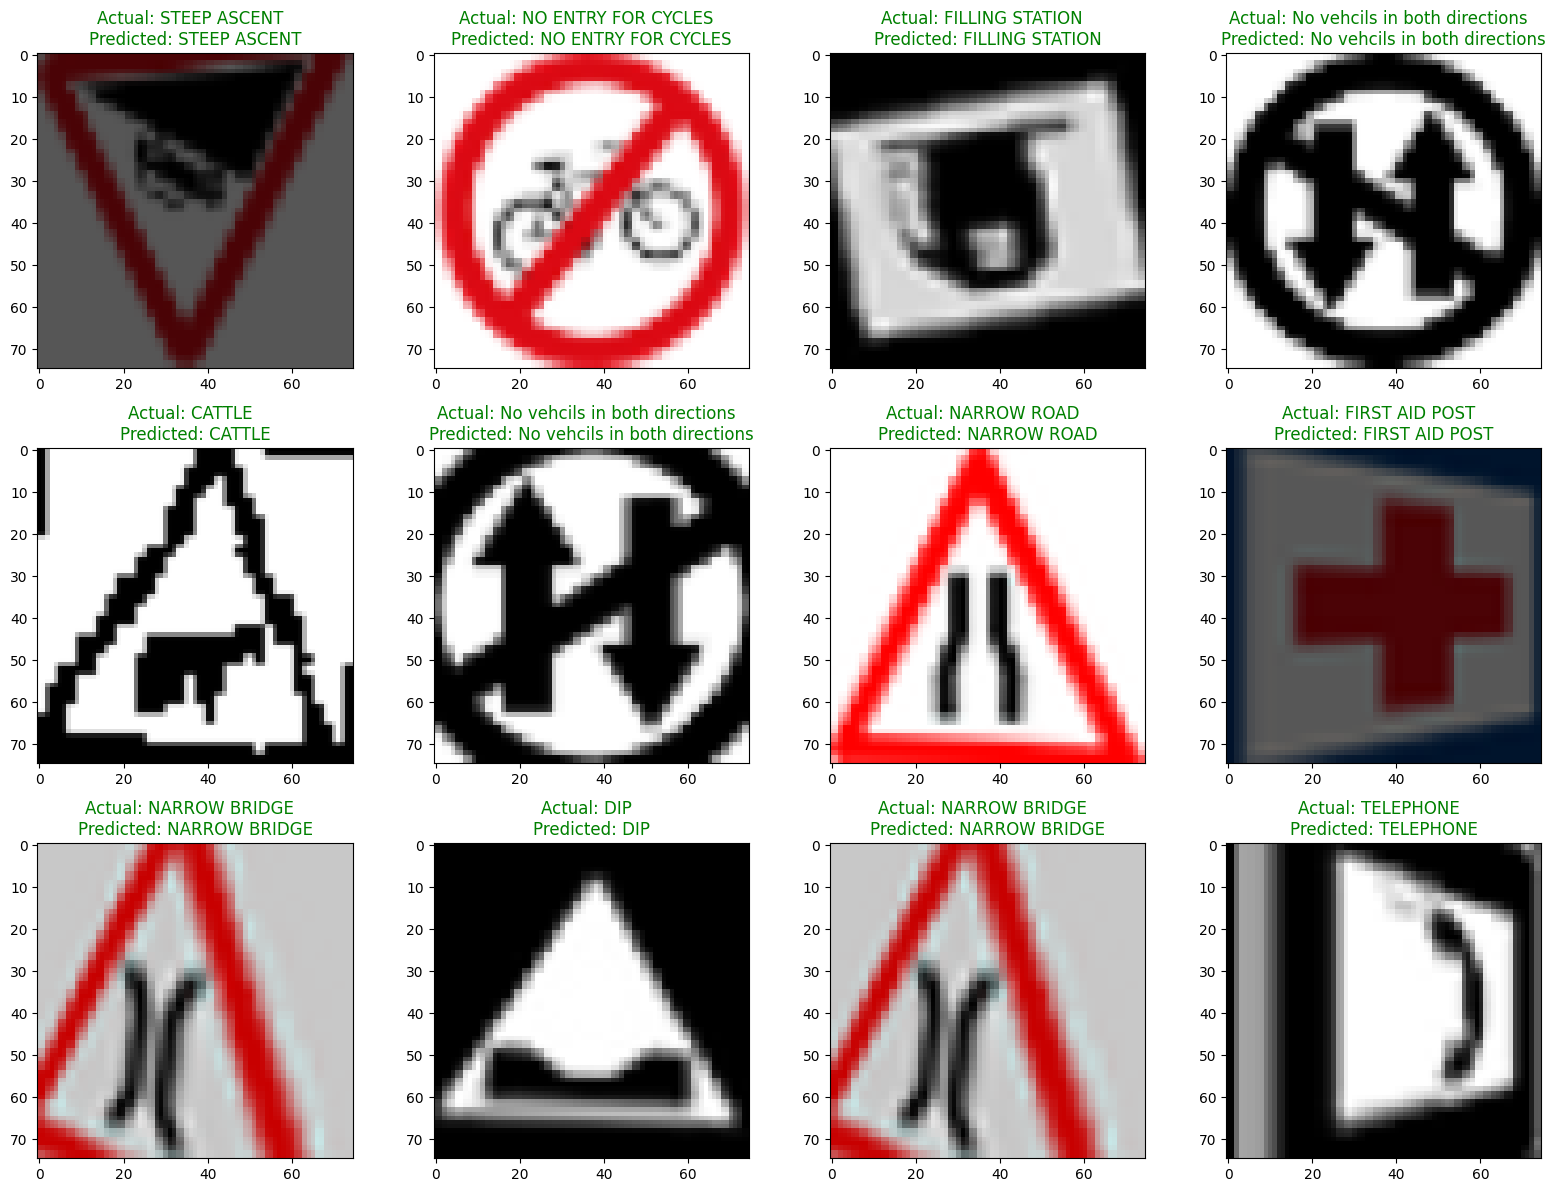

In [39]:
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = vgg_model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))
for i in range(3):
    for j in range (4):
        idx=rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[idx])
        if labels[idx] == predicts[idx]:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'green')
        else:
            ax[i,j].set_title('Actual: '+classes[labels[idx]]+'  \nPredicted: '+classes[predicts[idx]], color = 'red')

plt.tight_layout()